In [91]:
import os
import numpy as np
import pandas as pd
import cv2
import pickle
import shutil

import csv
from sklearn.cluster import KMeans
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import img_to_array  # Updated import
from keras.models import Model

In [9]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Preprocess for VGG16
    return image

In [96]:
def extract_features_from_image():
    
    # Extract features from images
    image_paths, features, class_labels, class_number = [], [], [], []

    for class_folder in os.listdir(image_folder_path):
        class_folder_path = os.path.join(image_folder_path, class_folder)
        # print(class_folder_path, class_folder_path.split('\\')[-1].split('.')[-1].replace('_', ' '))
        print(class_folder_path.split('\\')[-1])
        bird_lable = class_folder_path.split('\\')[-1].split('.')[-1].replace('_', ' ')
        bird_number = class_folder_path.split('\\')[-1].split('.')[0]

        # Ensure it's a directory
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                image_paths.append(image_path)  # Save the image path

                # Load and preprocess image
                image = load_and_preprocess_image(image_path)

                # Extract features
                feature = vgg_model.predict(image)
                features.append(feature.flatten())  # Flatten the feature array
                class_labels.append(bird_lable)
                class_number.append(bird_number)
                
    return (image_paths, features, class_labels, class_number)
    

In [54]:
def save_df(extract_features, CSV_PATH):
    features = np.array(extract_features[1])
    image_paths = np.array(extract_features[0])
    class_number = np.array(extract_features[3])
    class_labels = np.array(extract_features[2])

    df = pd.DataFrame(features)
    df['class_number'] = class_number
    df['class_labels'] = class_labels
    df['image_paths'] = image_paths
    display(df.head())
    
    df.to_csv(CSV_PATH, index=False)
    
    print(f"File saved to : {CSV_PATH}")
    
def train_kmean_model(N_CLUSTERS, features):
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters = N_CLUSTERS, random_state = 42)
    # clusters = kmeans.fit_predict(features) 
    # note : she using fit_predict which is wrong in this case need to use fit to train model
    kmeans.fit(features)
    
    return kmeans

# Function to save the model
def save_model(model, file_path):
    
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_path}")

# Function to load the model
def load_model(file_path):
    
    with open(file_path, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {file_path}")
    return model

# Function to predict with the loaded model
def predict(model, data):
    return model.predict(data)

In [97]:
# Path to your image dataset (200 folders)
IMAGE_DIR = os.path.join('..', 'Dataset', 'CUB_Dataset', 'CUB_Dataset', 'CUB_200_2011', 'images')
image_folder_path = IMAGE_DIR

# Parameters
IMG_SIZE = (224, 224)  # Image size for the CNN
N_CLUSTERS = 2 # Number of clusters

# Load pre-trained VGG16 model and remove the top layers
base_model = VGG16(weights='imagenet')
vgg_model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

vgg_model_file_path = os.path.join('..', 'Models', 'vgg_model.pkl')
save_model(vgg_model, vgg_model_file_path)

Model saved to ..\Models\vgg_model.pkl


## I have few querys ? 

1. How can we that much sure about the split ?
2. What if : it not split / cluster properly ? (Need to find out)

## Lest find 

In [32]:
%%time
extract_features = extract_features_from_image()
# print(len(extract_features))

001.Black_footed_Albatross
1/1 [==============================] - 0s 274ms/step
002.Laysan_Albatross
1/1 [==============================] - 0s 303ms/step
003.Sooty_Albatross
1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 279ms/step
004.Groove_billed_Ani
1/1 [==============================] - 0s 288ms/step
005.Crested_Auklet
1/1 [==============================] - 0s 281ms/step
006.Least_Auklet
1/1 [==============================] - 0s 311ms/step


1/1 [==============================] - 1s 504ms/step
007.Parakeet_Auklet
1/1 [==============================] - 0s 360ms/step
008.Rhinoceros_Auklet
1/1 [==============================] - 0s 290ms/step
009.Brewer_Blackbird
1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 275ms/step
010.Red_winged_Blackbird
1/1 [==============================] - 0s 300ms/step
011.Rusty_Blackbird
1/1 [==============================] - 0s 320ms/step
012.Yellow_headed_Blackbird
1/1 [==============================] - 0s 319ms/step


1/1 [==============================] - 0s 269ms/step
013.Bobolink
1/1 [==============================] - 0s 276ms/step
014.Indigo_Bunting
1/1 [==============================] - 0s 298ms/step


1/1 [==============================] - 0s 377ms/step
015.Lazuli_Bunting
1/1 [==============================] - 0s 334ms/step
016.Painted_Bunting
1/1 [==============================] - 0s 324ms/step
017.Cardinal
1/1 [==============================] - 0s 312ms/step


1/1 [==============================] - 0s 340ms/step
018.Spotted_Catbird
1/1 [==============================] - 0s 331ms/step
019.Gray_Catbird
1/1 [==============================] - 0s 313ms/step
020.Yellow_breasted_Chat
1/1 [==============================] - 0s 364ms/step


1/1 [==============================] - 0s 313ms/step
021.Eastern_Towhee
1/1 [==============================] - 0s 324ms/step
022.Chuck_will_Widow
1/1 [==============================] - 0s 376ms/step


1/1 [==============================] - 0s 326ms/step
023.Brandt_Cormorant
1/1 [==============================] - 0s 301ms/step
024.Red_faced_Cormorant
1/1 [==============================] - 0s 298ms/step
025.Pelagic_Cormorant
1/1 [==============================] - 0s 320ms/step


1/1 [==============================] - 0s 311ms/step
026.Bronzed_Cowbird
1/1 [==============================] - 0s 367ms/step
027.Shiny_Cowbird
1/1 [==============================] - 0s 289ms/step
028.Brown_Creeper
1/1 [==============================] - 0s 326ms/step


1/1 [==============================] - 0s 326ms/step
029.American_Crow
1/1 [==============================] - 0s 291ms/step
030.Fish_Crow
1/1 [==============================] - 0s 310ms/step


1/1 [==============================] - 0s 330ms/step
031.Black_billed_Cuckoo
1/1 [==============================] - 0s 300ms/step
032.Mangrove_Cuckoo
1/1 [==============================] - 0s 280ms/step
033.Yellow_billed_Cuckoo
1/1 [==============================] - 0s 292ms/step


1/1 [==============================] - 0s 282ms/step
034.Gray_crowned_Rosy_Finch
1/1 [==============================] - 0s 287ms/step
035.Purple_Finch
1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 276ms/step
036.Northern_Flicker
1/1 [==============================] - 0s 277ms/step
037.Acadian_Flycatcher
1/1 [==============================] - 0s 277ms/step
038.Great_Crested_Flycatcher
1/1 [==============================] - 0s 300ms/step


1/1 [==============================] - 0s 276ms/step
039.Least_Flycatcher
1/1 [==============================] - 0s 293ms/step
040.Olive_sided_Flycatcher
1/1 [==============================] - 0s 366ms/step
041.Scissor_tailed_Flycatcher
1/1 [==============================] - 0s 364ms/step


1/1 [==============================] - 0s 286ms/step
042.Vermilion_Flycatcher
1/1 [==============================] - 0s 290ms/step
043.Yellow_bellied_Flycatcher
1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 273ms/step
044.Frigatebird
1/1 [==============================] - 0s 281ms/step
045.Northern_Fulmar
1/1 [==============================] - 0s 275ms/step
046.Gadwall
1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 277ms/step
047.American_Goldfinch
1/1 [==============================] - 0s 285ms/step
048.European_Goldfinch
1/1 [==============================] - 0s 311ms/step


1/1 [==============================] - 0s 281ms/step
049.Boat_tailed_Grackle
1/1 [==============================] - 0s 275ms/step
050.Eared_Grebe
1/1 [==============================] - 0s 293ms/step
051.Horned_Grebe
1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 303ms/step
052.Pied_billed_Grebe
1/1 [==============================] - 0s 269ms/step
053.Western_Grebe
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 282ms/step
054.Blue_Grosbeak
1/1 [==============================] - 0s 291ms/step
055.Evening_Grosbeak
1/1 [==============================] - 0s 286ms/step
056.Pine_Grosbeak
1/1 [==============================] - 0s 295ms/step


1/1 [==============================] - 0s 288ms/step
057.Rose_breasted_Grosbeak
1/1 [==============================] - 0s 268ms/step
058.Pigeon_Guillemot
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 287ms/step
059.California_Gull
1/1 [==============================] - 0s 314ms/step
060.Glaucous_winged_Gull
1/1 [==============================] - 0s 281ms/step
061.Heermann_Gull
1/1 [==============================] - 0s 288ms/step


1/1 [==============================] - 0s 285ms/step
062.Herring_Gull
1/1 [==============================] - 0s 281ms/step
063.Ivory_Gull
1/1 [==============================] - 0s 281ms/step
064.Ring_billed_Gull
1/1 [==============================] - 0s 281ms/step


1/1 [==============================] - 0s 285ms/step
065.Slaty_backed_Gull
1/1 [==============================] - 0s 281ms/step
066.Western_Gull
1/1 [==============================] - 0s 287ms/step


1/1 [==============================] - 0s 318ms/step
067.Anna_Hummingbird
1/1 [==============================] - 0s 277ms/step
068.Ruby_throated_Hummingbird
1/1 [==============================] - 0s 396ms/step
069.Rufous_Hummingbird
1/1 [==============================] - 0s 320ms/step


1/1 [==============================] - 0s 344ms/step
070.Green_Violetear
1/1 [==============================] - 0s 284ms/step
071.Long_tailed_Jaeger
1/1 [==============================] - 0s 323ms/step


1/1 [==============================] - 0s 272ms/step
072.Pomarine_Jaeger
1/1 [==============================] - 0s 292ms/step
073.Blue_Jay
1/1 [==============================] - 0s 267ms/step
074.Florida_Jay
1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 437ms/step
075.Green_Jay
1/1 [==============================] - 0s 283ms/step
076.Dark_eyed_Junco
1/1 [==============================] - 0s 278ms/step
077.Tropical_Kingbird
1/1 [==============================] - 0s 284ms/step


1/1 [==============================] - 0s 279ms/step
078.Gray_Kingbird
1/1 [==============================] - 0s 278ms/step
079.Belted_Kingfisher
1/1 [==============================] - 0s 273ms/step


1/1 [==============================] - 0s 278ms/step
080.Green_Kingfisher
1/1 [==============================] - 0s 277ms/step
081.Pied_Kingfisher
1/1 [==============================] - 0s 279ms/step
082.Ringed_Kingfisher
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 277ms/step
083.White_breasted_Kingfisher
1/1 [==============================] - 0s 297ms/step
084.Red_legged_Kittiwake
1/1 [==============================] - 0s 269ms/step


1/1 [==============================] - 0s 279ms/step
085.Horned_Lark
1/1 [==============================] - 0s 279ms/step
086.Pacific_Loon
1/1 [==============================] - 0s 279ms/step
087.Mallard
1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 279ms/step
088.Western_Meadowlark
1/1 [==============================] - 0s 290ms/step
089.Hooded_Merganser
1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 280ms/step
090.Red_breasted_Merganser
1/1 [==============================] - 0s 279ms/step
091.Mockingbird
1/1 [==============================] - 0s 281ms/step
092.Nighthawk
1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 340ms/step
093.Clark_Nutcracker
1/1 [==============================] - 0s 275ms/step
094.White_breasted_Nuthatch
1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 275ms/step
095.Baltimore_Oriole
1/1 [==============================] - 0s 276ms/step
096.Hooded_Oriole
1/1 [==============================] - 0s 285ms/step
097.Orchard_Oriole
1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 299ms/step
098.Scott_Oriole
1/1 [==============================] - 0s 278ms/step
099.Ovenbird
1/1 [==============================] - 0s 285ms/step
100.Brown_Pelican
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 291ms/step
101.White_Pelican
1/1 [==============================] - 0s 285ms/step
102.Western_Wood_Pewee
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 279ms/step
103.Sayornis
1/1 [==============================] - 0s 288ms/step
104.American_Pipit
1/1 [==============================] - 0s 279ms/step
105.Whip_poor_Will
1/1 [==============================] - 0s 281ms/step


1/1 [==============================] - 0s 280ms/step
106.Horned_Puffin
1/1 [==============================] - 0s 279ms/step
107.Common_Raven
1/1 [==============================] - 0s 280ms/step
108.White_necked_Raven
1/1 [==============================] - 0s 281ms/step


1/1 [==============================] - 0s 277ms/step
109.American_Redstart
1/1 [==============================] - 0s 280ms/step
110.Geococcyx
1/1 [==============================] - 0s 324ms/step


1/1 [==============================] - 0s 279ms/step
111.Loggerhead_Shrike
1/1 [==============================] - 0s 277ms/step
112.Great_Grey_Shrike
1/1 [==============================] - 0s 280ms/step
113.Baird_Sparrow
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 273ms/step
114.Black_throated_Sparrow
1/1 [==============================] - 0s 276ms/step
115.Brewer_Sparrow
1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 280ms/step
116.Chipping_Sparrow
1/1 [==============================] - 0s 281ms/step
117.Clay_colored_Sparrow
1/1 [==============================] - 0s 279ms/step
118.House_Sparrow
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 278ms/step
119.Field_Sparrow
1/1 [==============================] - 0s 295ms/step
120.Fox_Sparrow
1/1 [==============================] - 0s 280ms/step
121.Grasshopper_Sparrow
1/1 [==============================] - 0s 285ms/step


1/1 [==============================] - 0s 280ms/step
122.Harris_Sparrow
1/1 [==============================] - 0s 290ms/step
123.Henslow_Sparrow
1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 280ms/step
124.Le_Conte_Sparrow
1/1 [==============================] - 0s 279ms/step
125.Lincoln_Sparrow
1/1 [==============================] - 0s 277ms/step
126.Nelson_Sharp_tailed_Sparrow
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 281ms/step
127.Savannah_Sparrow
1/1 [==============================] - 0s 281ms/step
128.Seaside_Sparrow
1/1 [==============================] - 0s 284ms/step


1/1 [==============================] - 0s 300ms/step
129.Song_Sparrow
1/1 [==============================] - 0s 306ms/step
130.Tree_Sparrow
1/1 [==============================] - 0s 279ms/step
131.Vesper_Sparrow
1/1 [==============================] - 0s 302ms/step


1/1 [==============================] - 0s 286ms/step
132.White_crowned_Sparrow
1/1 [==============================] - 0s 277ms/step
133.White_throated_Sparrow
1/1 [==============================] - 0s 293ms/step


1/1 [==============================] - 0s 282ms/step
134.Cape_Glossy_Starling
1/1 [==============================] - 0s 278ms/step
135.Bank_Swallow
1/1 [==============================] - 0s 280ms/step
136.Barn_Swallow
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 284ms/step
137.Cliff_Swallow
1/1 [==============================] - 0s 281ms/step
138.Tree_Swallow
1/1 [==============================] - 0s 281ms/step


139.Scarlet_Tanager
1/1 [==============================] - 0s 293ms/step
140.Summer_Tanager
1/1 [==============================] - 0s 281ms/step
141.Artic_Tern
1/1 [==============================] - 0s 275ms/step


1/1 [==============================] - 0s 279ms/step
142.Black_Tern
1/1 [==============================] - 0s 279ms/step
143.Caspian_Tern
1/1 [==============================] - 0s 280ms/step
144.Common_Tern
1/1 [==============================] - 0s 322ms/step


1/1 [==============================] - 0s 283ms/step
145.Elegant_Tern
1/1 [==============================] - 0s 289ms/step
146.Forsters_Tern
1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 279ms/step
147.Least_Tern
1/1 [==============================] - 0s 281ms/step
148.Green_tailed_Towhee
1/1 [==============================] - 0s 288ms/step
149.Brown_Thrasher
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 280ms/step
150.Sage_Thrasher
1/1 [==============================] - 0s 285ms/step
151.Black_capped_Vireo
1/1 [==============================] - 0s 295ms/step


1/1 [==============================] - 0s 277ms/step
152.Blue_headed_Vireo
1/1 [==============================] - 0s 279ms/step
153.Philadelphia_Vireo
1/1 [==============================] - 0s 284ms/step
154.Red_eyed_Vireo
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 281ms/step
155.Warbling_Vireo
1/1 [==============================] - 0s 278ms/step
156.White_eyed_Vireo
1/1 [==============================] - 0s 333ms/step
157.Yellow_throated_Vireo
1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 320ms/step
158.Bay_breasted_Warbler
1/1 [==============================] - 0s 287ms/step
159.Black_and_white_Warbler
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 303ms/step
160.Black_throated_Blue_Warbler
1/1 [==============================] - 0s 319ms/step
161.Blue_winged_Warbler
1/1 [==============================] - 0s 292ms/step
162.Canada_Warbler
1/1 [==============================] - 0s 320ms/step


1/1 [==============================] - 0s 264ms/step
163.Cape_May_Warbler
1/1 [==============================] - 0s 324ms/step
164.Cerulean_Warbler
1/1 [==============================] - 0s 369ms/step


1/1 [==============================] - 0s 368ms/step
165.Chestnut_sided_Warbler
1/1 [==============================] - 0s 279ms/step
166.Golden_winged_Warbler
1/1 [==============================] - 0s 274ms/step
167.Hooded_Warbler
1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 279ms/step
168.Kentucky_Warbler
1/1 [==============================] - 0s 272ms/step
169.Magnolia_Warbler
1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 276ms/step
170.Mourning_Warbler
1/1 [==============================] - 0s 276ms/step
171.Myrtle_Warbler
1/1 [==============================] - 0s 278ms/step
172.Nashville_Warbler
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 279ms/step
173.Orange_crowned_Warbler
1/1 [==============================] - 0s 341ms/step
174.Palm_Warbler
1/1 [==============================] - 0s 293ms/step
175.Pine_Warbler
1/1 [==============================] - 0s 283ms/step


1/1 [==============================] - 0s 287ms/step
176.Prairie_Warbler
1/1 [==============================] - 0s 295ms/step
177.Prothonotary_Warbler
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 281ms/step
178.Swainson_Warbler
1/1 [==============================] - 0s 282ms/step
179.Tennessee_Warbler
1/1 [==============================] - 0s 322ms/step
180.Wilson_Warbler
1/1 [==============================] - 0s 341ms/step


1/1 [==============================] - 0s 301ms/step
181.Worm_eating_Warbler
1/1 [==============================] - 0s 282ms/step
182.Yellow_Warbler
1/1 [==============================] - 0s 305ms/step


1/1 [==============================] - 0s 300ms/step
183.Northern_Waterthrush
1/1 [==============================] - 0s 278ms/step
184.Louisiana_Waterthrush
1/1 [==============================] - 0s 316ms/step
185.Bohemian_Waxwing
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 336ms/step
186.Cedar_Waxwing
1/1 [==============================] - 0s 305ms/step
187.American_Three_toed_Woodpecker
1/1 [==============================] - 0s 283ms/step
188.Pileated_Woodpecker
1/1 [==============================] - 0s 369ms/step


1/1 [==============================] - 0s 287ms/step
189.Red_bellied_Woodpecker
1/1 [==============================] - 0s 278ms/step
190.Red_cockaded_Woodpecker
1/1 [==============================] - 0s 309ms/step


1/1 [==============================] - 0s 277ms/step
191.Red_headed_Woodpecker
1/1 [==============================] - 0s 281ms/step
192.Downy_Woodpecker
1/1 [==============================] - 0s 286ms/step
193.Bewick_Wren
1/1 [==============================] - 0s 276ms/step


1/1 [==============================] - 0s 346ms/step
194.Cactus_Wren
1/1 [==============================] - 0s 348ms/step
195.Carolina_Wren
1/1 [==============================] - 0s 284ms/step


1/1 [==============================] - 0s 300ms/step
196.House_Wren
1/1 [==============================] - 0s 302ms/step
197.Marsh_Wren
1/1 [==============================] - 0s 303ms/step
198.Rock_Wren
1/1 [==============================] - 0s 284ms/step


1/1 [==============================] - 0s 286ms/step
199.Winter_Wren
1/1 [==============================] - 0s 296ms/step
200.Common_Yellowthroat
1/1 [==============================] - 0s 283ms/step


1/1 [==============================] - 0s 302ms/step
4
CPU times: total: 3h 24min 52s
Wall time: 1h 10min 31s


In [48]:
%%time
# Save dataframe
CSV_PATH = os.path.join('..', 'Dataset', 'images_extract_features.csv')
save_df(extract_features, CSV_PATH)

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,class_number,class_labels,image_paths
0,3.042403,2.884922,0.000000,7.585155,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...
1,0.000000,0.000000,9.547824,5.867018,0.0,0.0,0.0,0.0,0.547732,0.614757,...,0.000000,0.0,0.0,13.213732,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...
2,4.043432,0.000000,0.000000,1.765985,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...
3,0.000000,0.643451,0.000000,11.106439,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,3.763441,2.361611,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...
4,4.628634,3.541798,0.000000,2.993902,0.0,0.0,0.0,0.0,0.000000,0.000000,...,6.767929,0.0,0.0,1.820253,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...


File saved to : ..\Dataset\images_extract_features.csv


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)


In [53]:
# Convert features to numpy array
features = np.array(extract_features[1])

# Train Kmean model
clusters = train_kmean_model(N_CLUSTERS, features)
print(clusters)

# Save the model
file_path = os.path.join('..', 'Models', 'kmean_model.pkl')
save_model(clusters, file_path)

# Load the model
clusters = load_model(file_path)

# Predict with the loaded model
y_pred_clusters = predict(clusters, features)
print(y_pred_clusters)

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)
Model saved to ..\Models\kmean_model.pkl
Model loaded from ..\Models\kmean_model.pkl
[0 0 0 ... 0 1 1]


In [57]:
CSV_PATH = os.path.join('..', 'Dataset', 'images_extract_features.csv')
df = pd.read_csv(CSV_PATH)
df['y_pred_clusters'] = y_pred_clusters
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,class_number,class_labels,image_paths,y_pred_clusters
0,3.042403,2.884922,0.000000,7.585155,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
1,0.000000,0.000000,9.547824,5.867018,0.0,0.0,0.0,0.0,0.547732,0.614757,...,0.0,0.0,13.213732,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
2,4.043432,0.000000,0.000000,1.765985,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
3,0.000000,0.643451,0.000000,11.106439,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,3.763441,2.361611,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
4,4.628635,3.541798,0.000000,2.993902,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,1.820253,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35,8))

# sns.barplot(df, x="y_pred_clusters", y="class_number", hue="class_number")

<Figure size 3500x800 with 0 Axes>

<Figure size 3500x800 with 0 Axes>

<Axes: xlabel='class_number', ylabel='y_pred_clusters'>

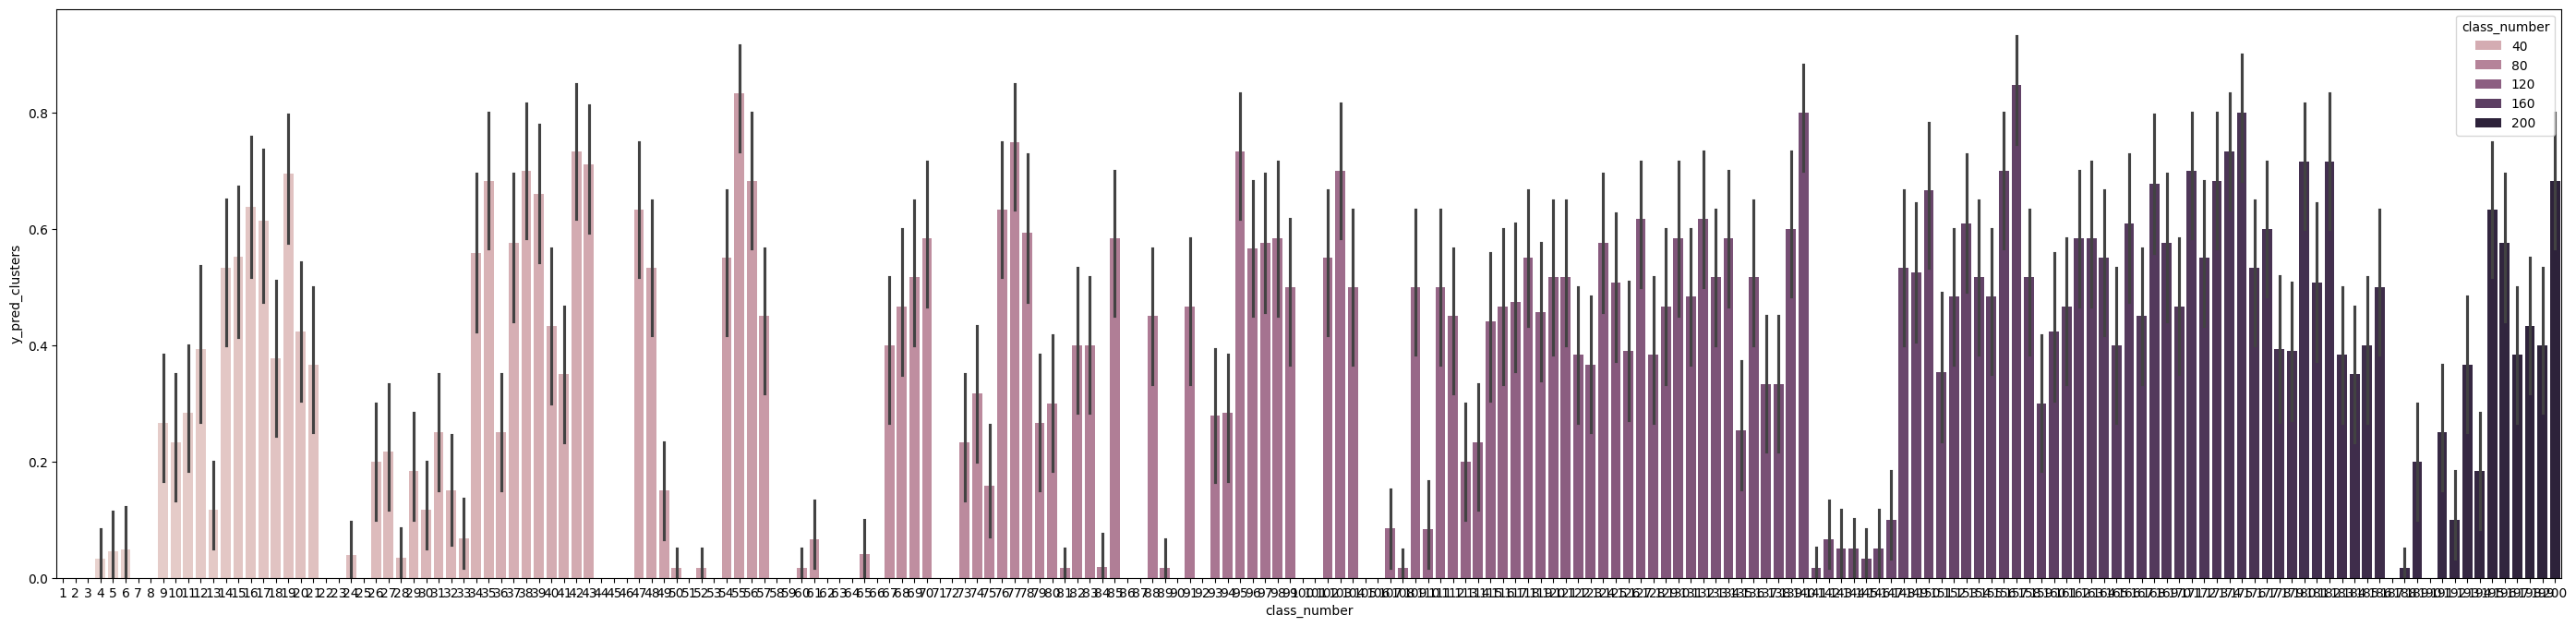

In [61]:
sns.barplot(df, x="y_pred_clusters", y="y_pred_clusters", hue="class_number")

<Axes: xlabel='y_pred_clusters', ylabel='count'>

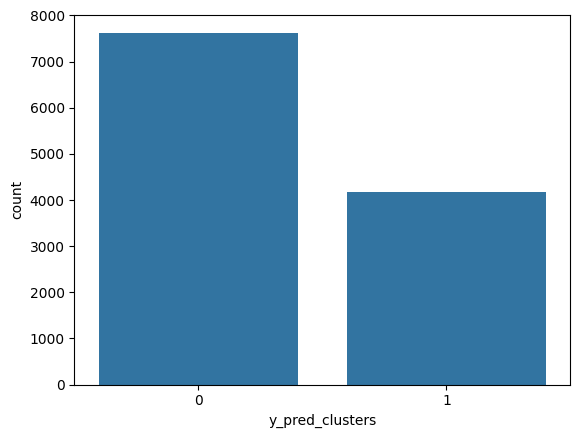

In [65]:
sns.countplot(x='y_pred_clusters', data=df)

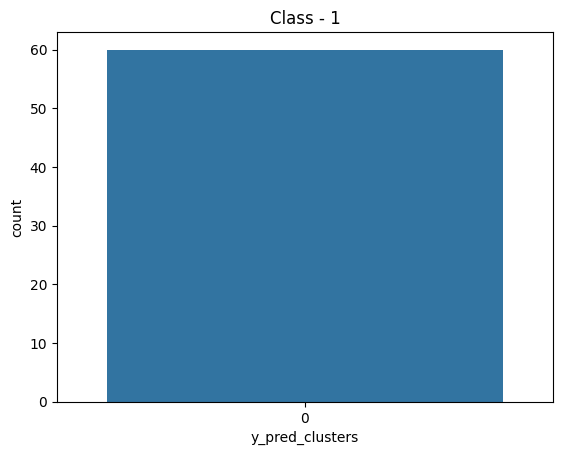

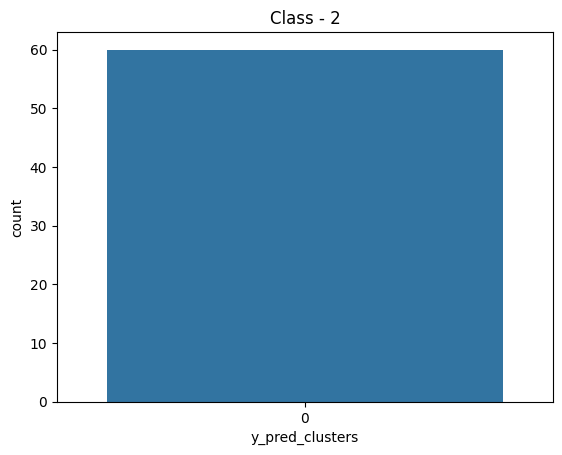

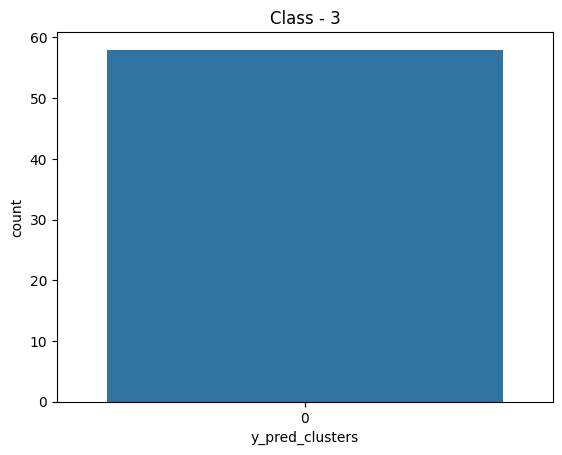

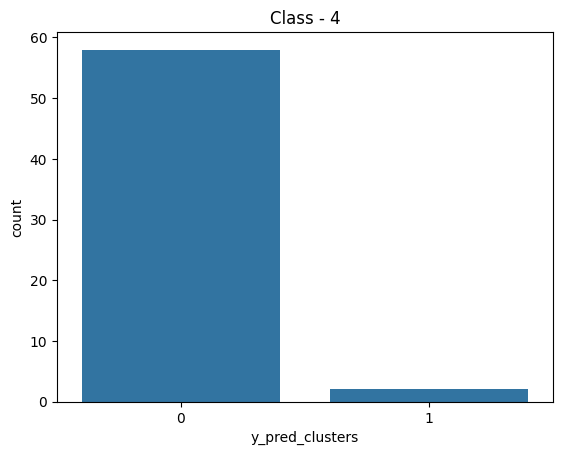

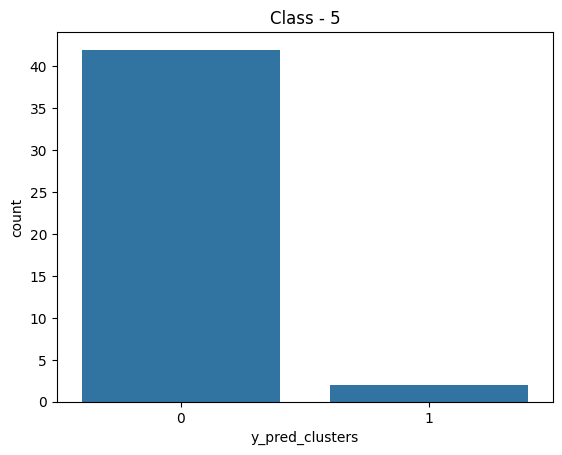

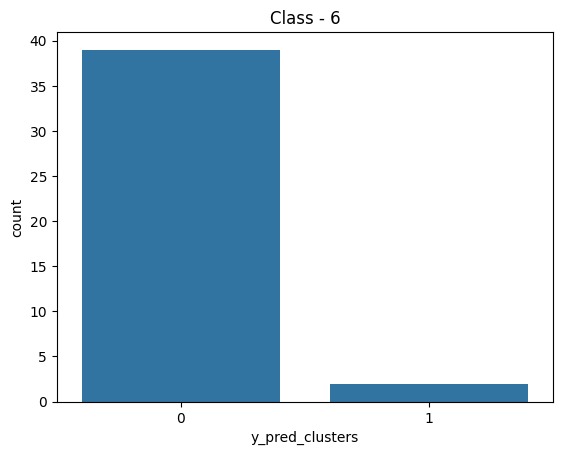

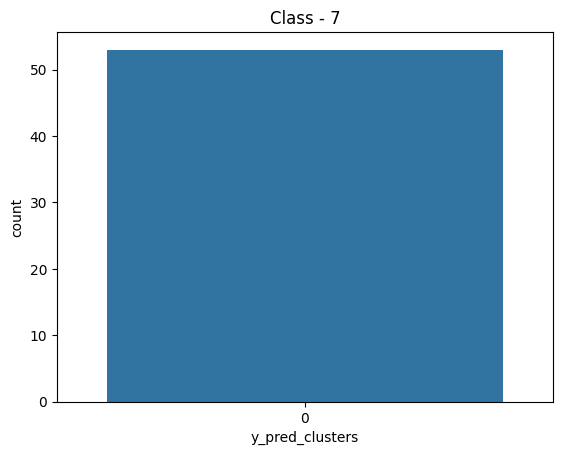

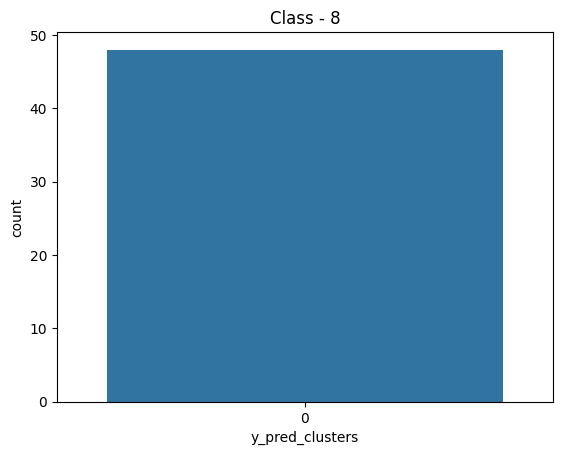

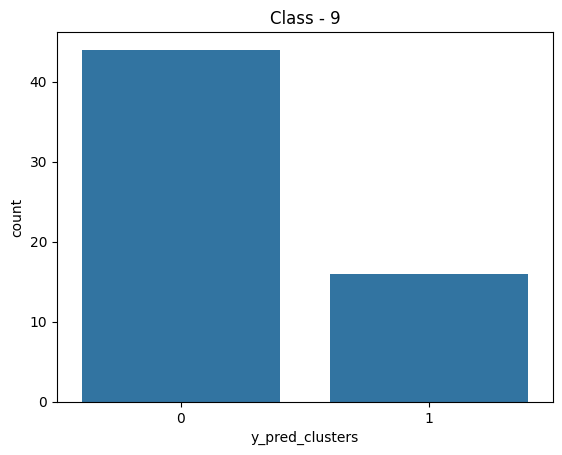

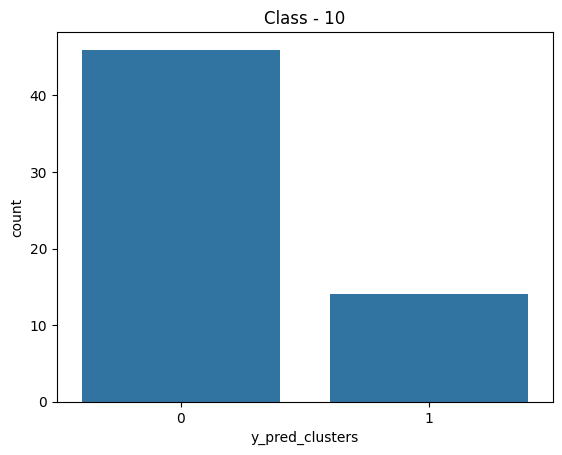

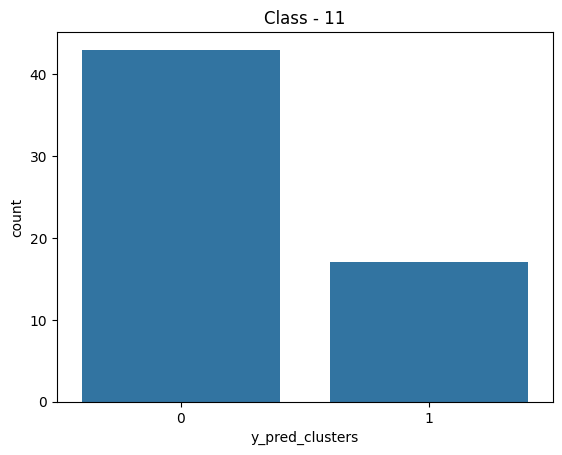

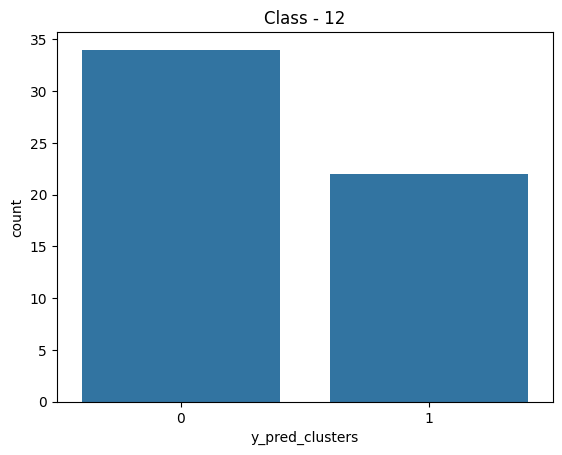

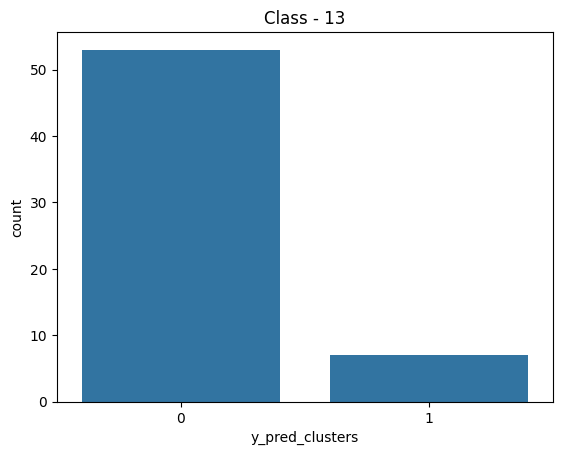

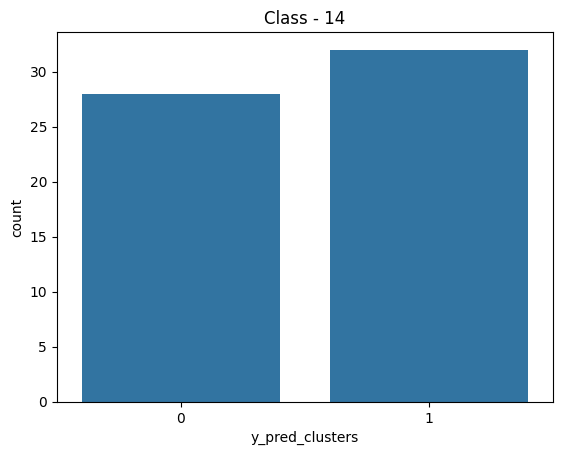

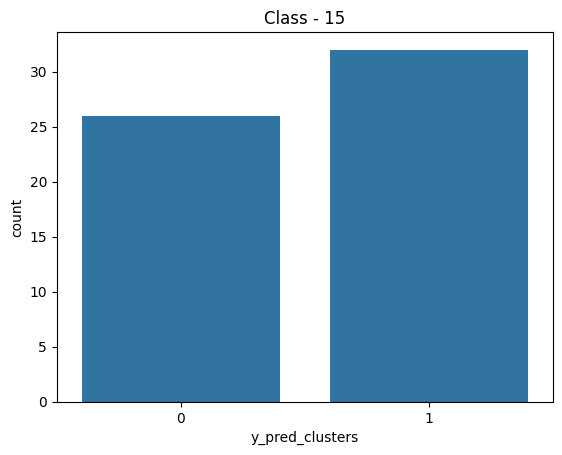

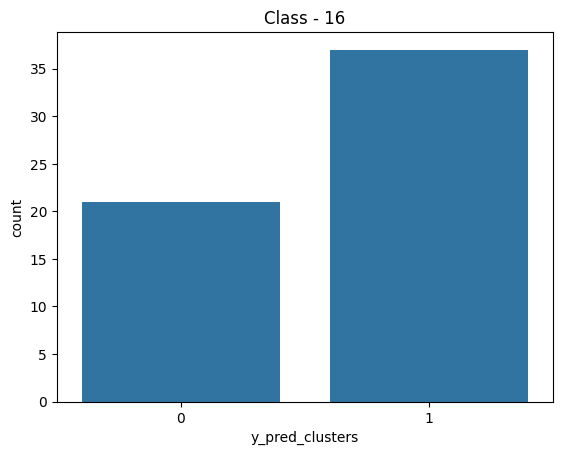

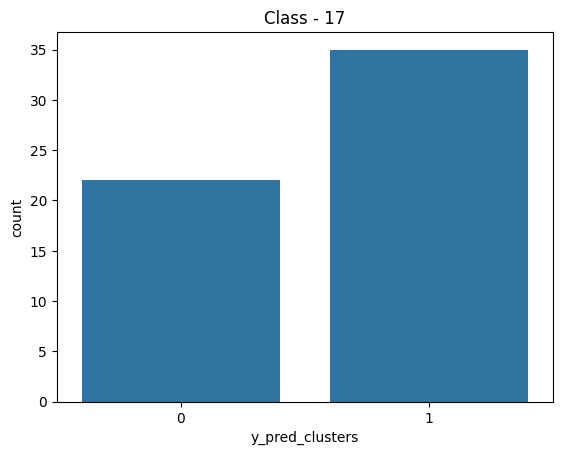

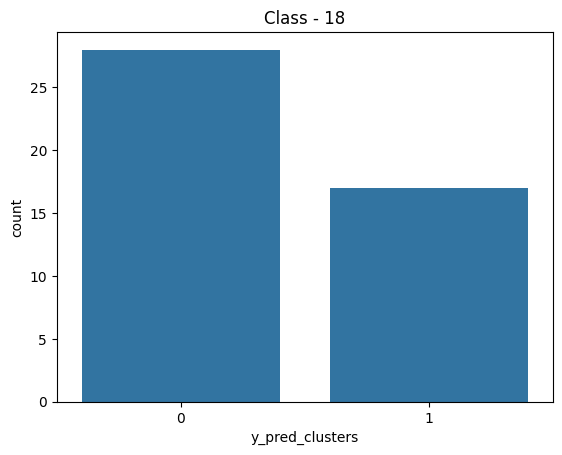

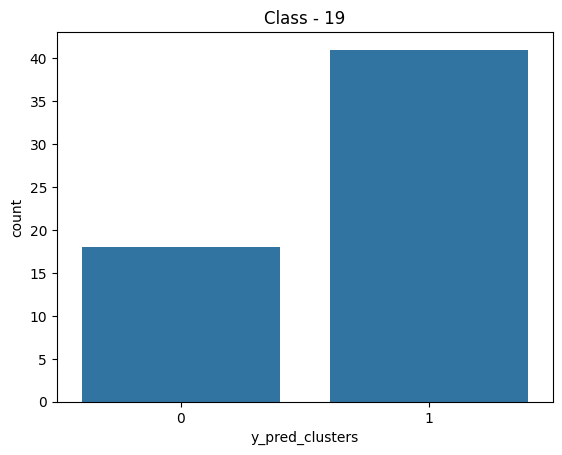

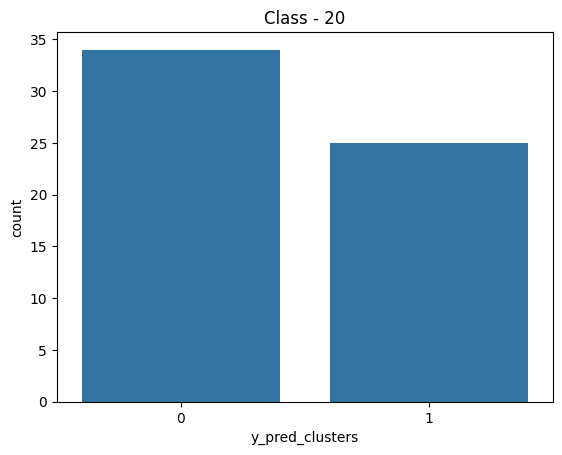

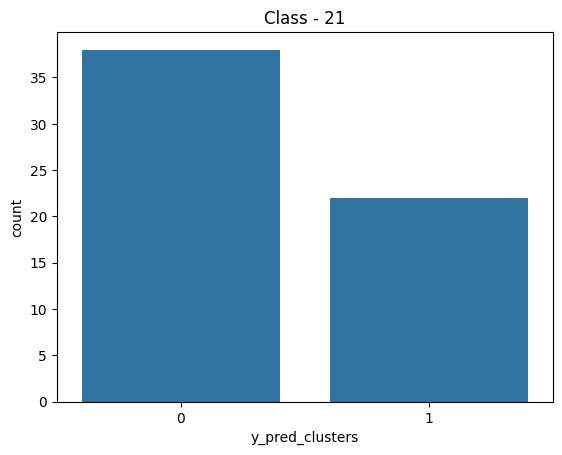

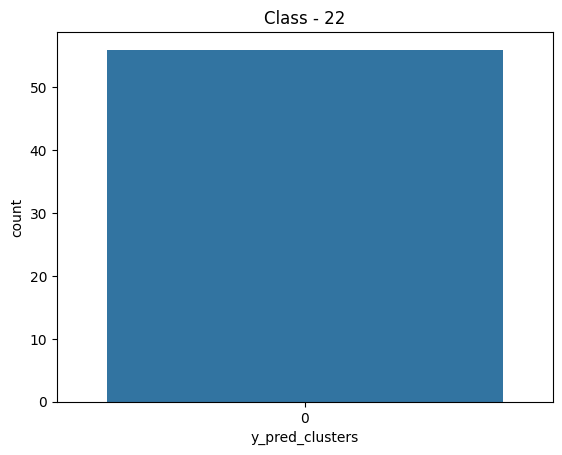

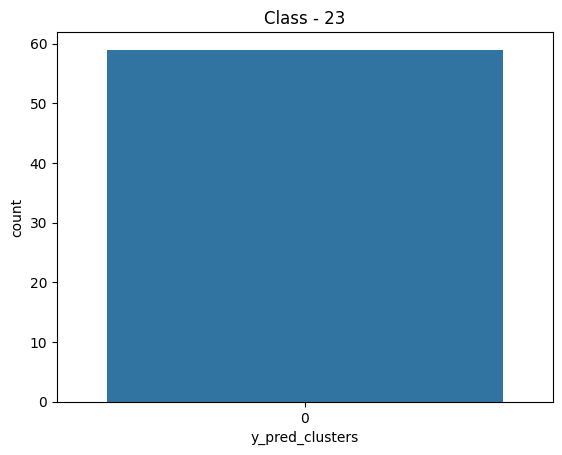

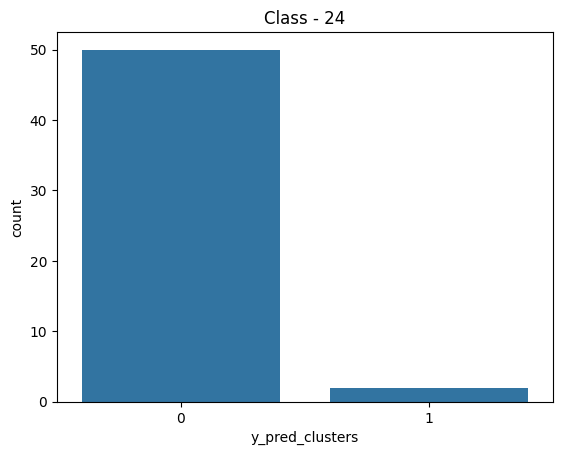

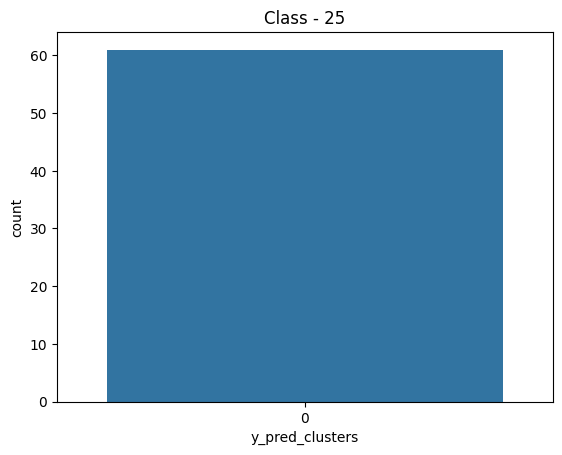

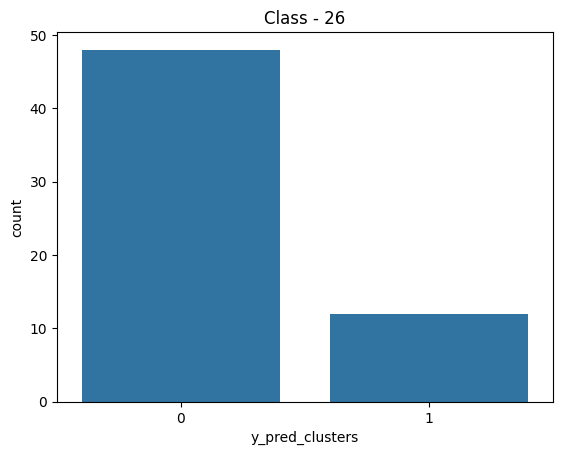

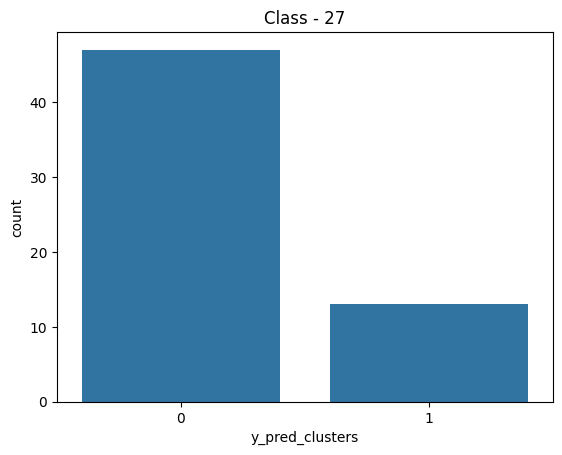

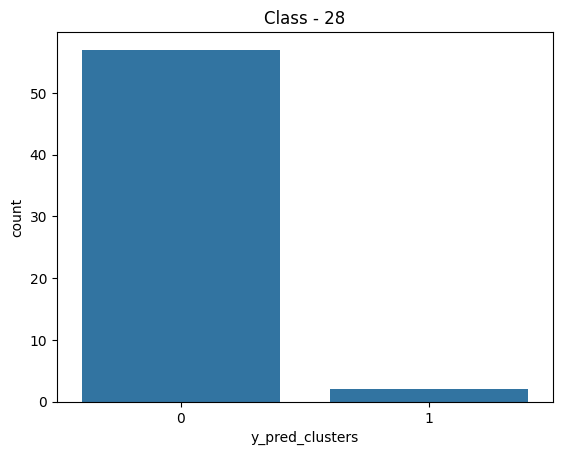

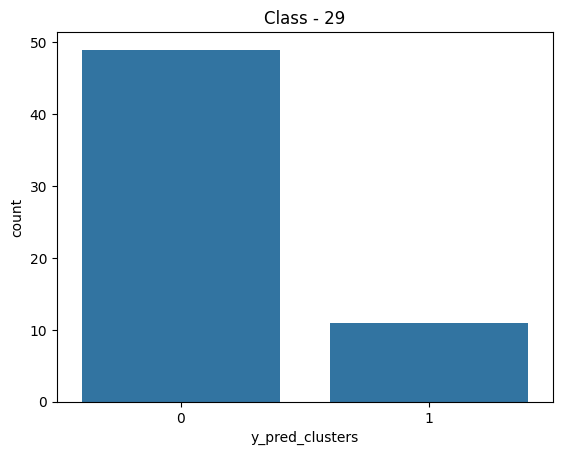

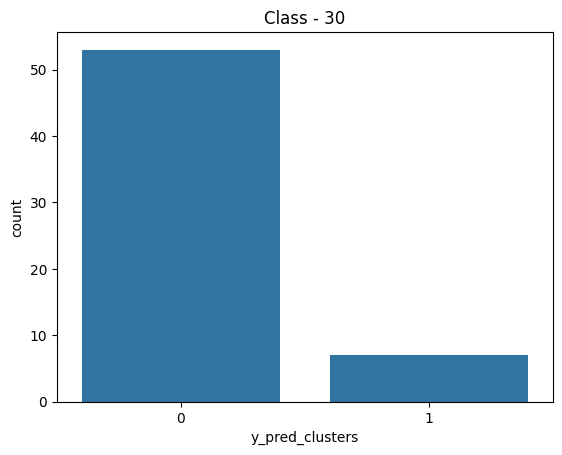

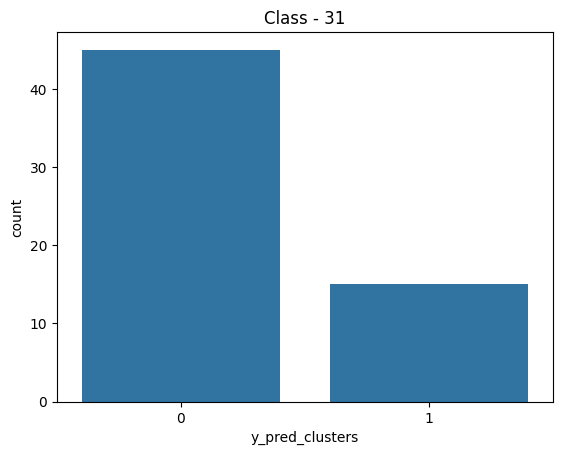

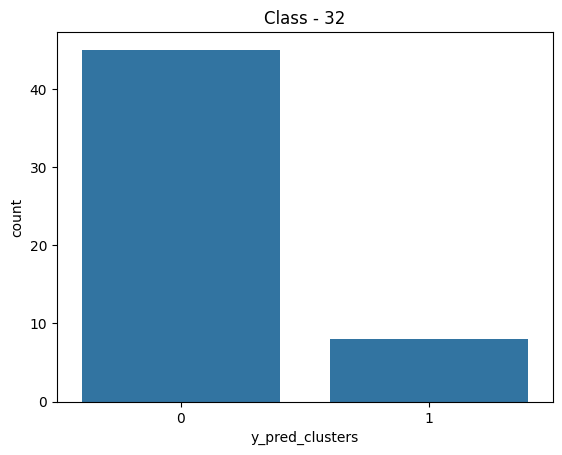

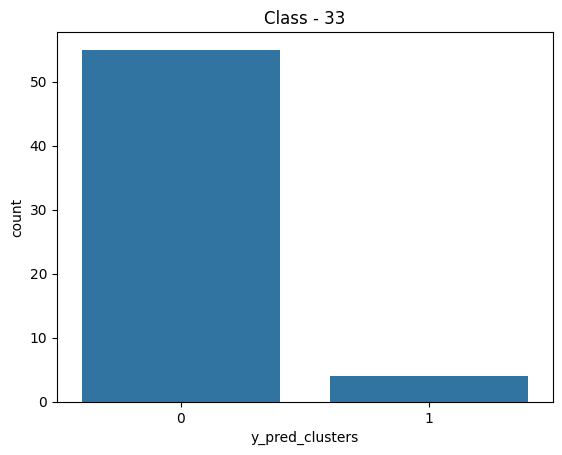

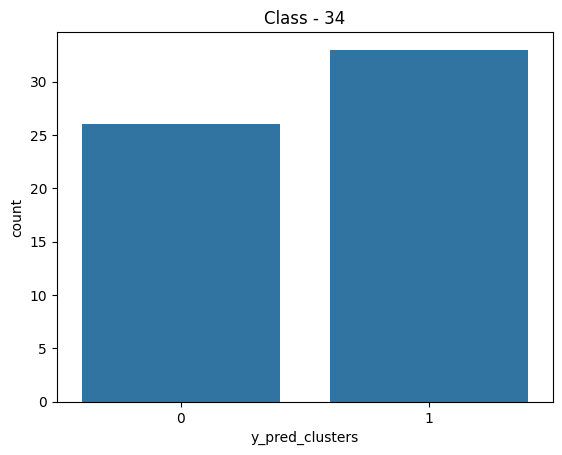

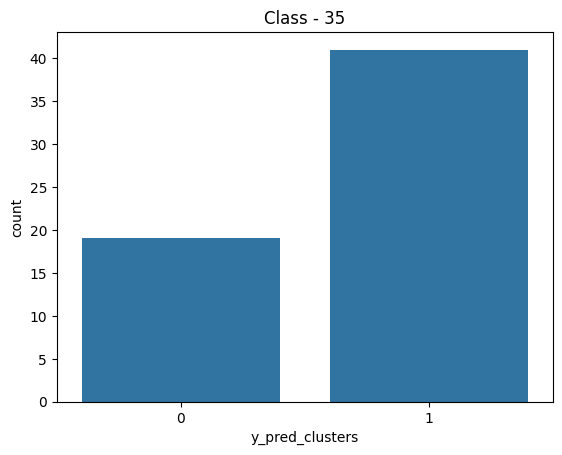

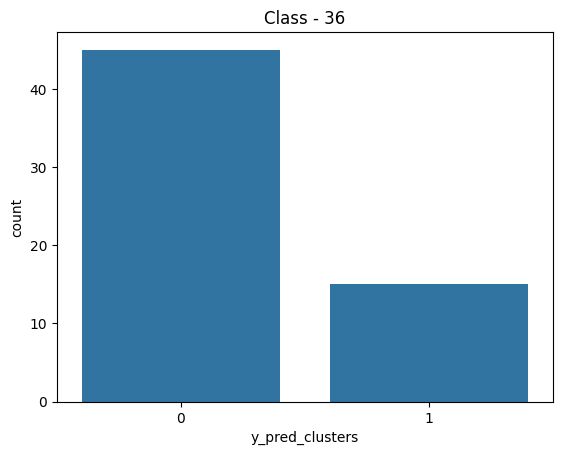

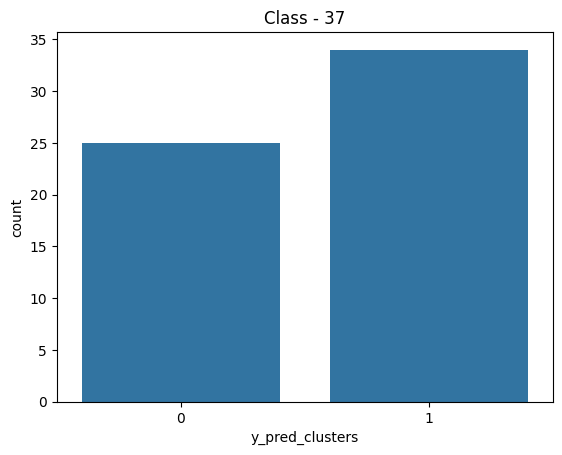

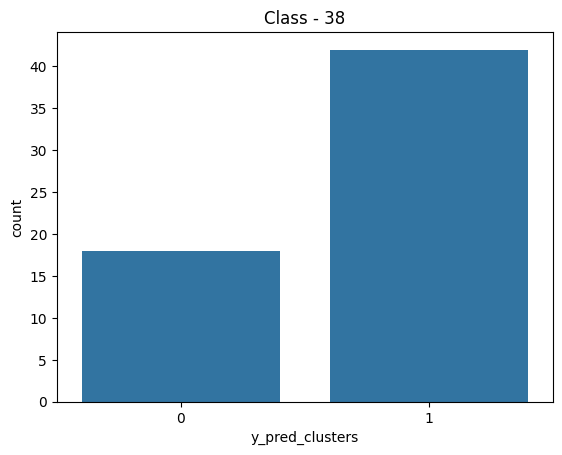

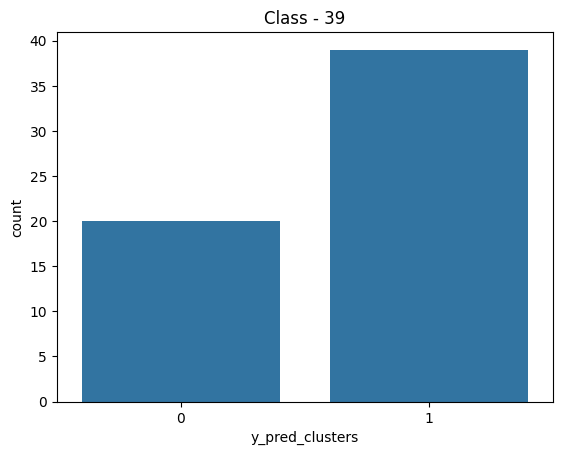

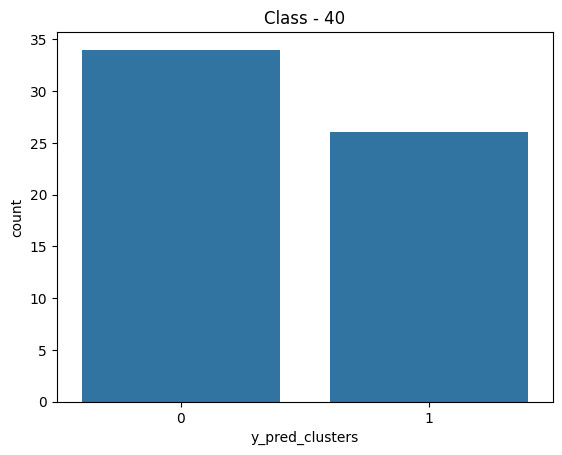

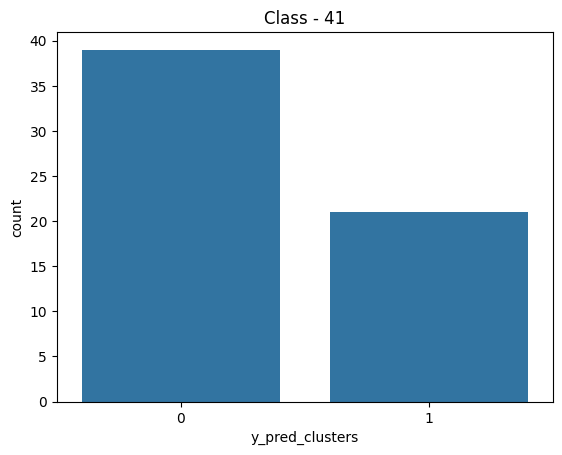

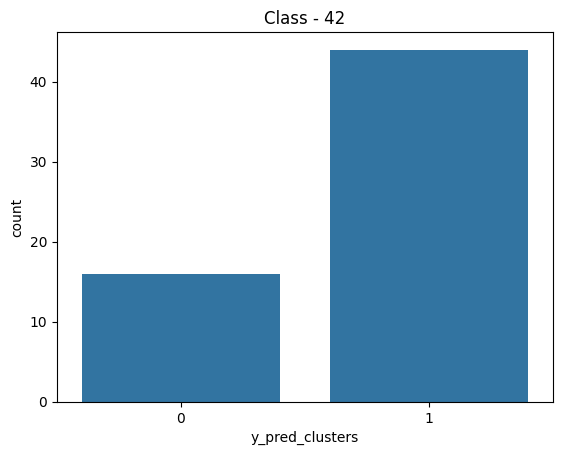

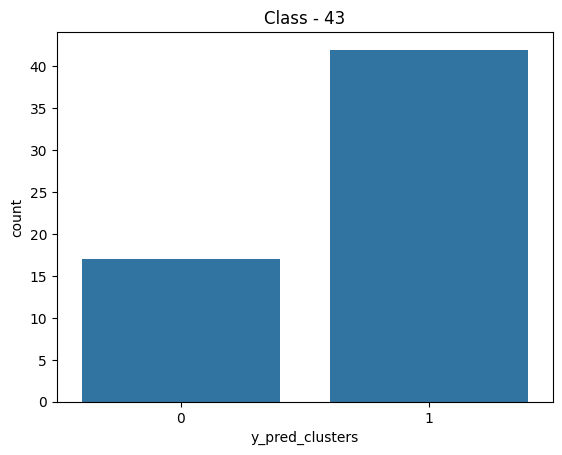

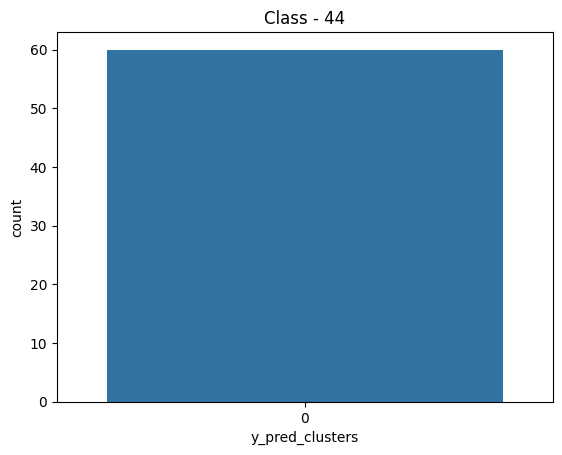

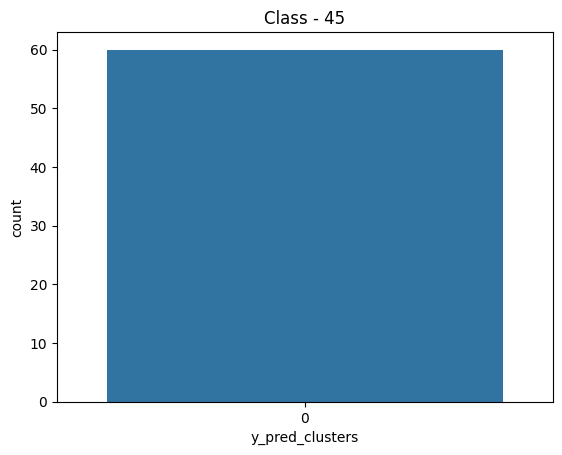

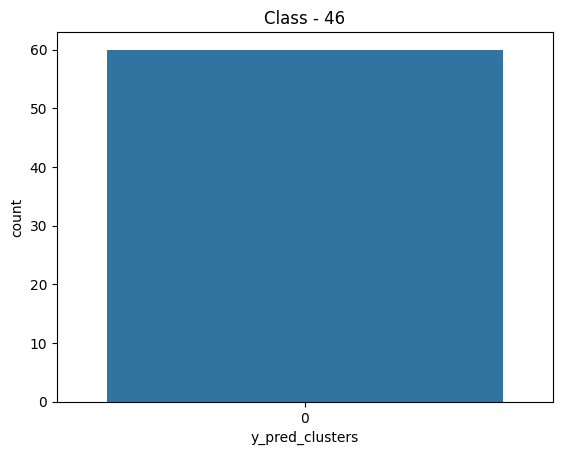

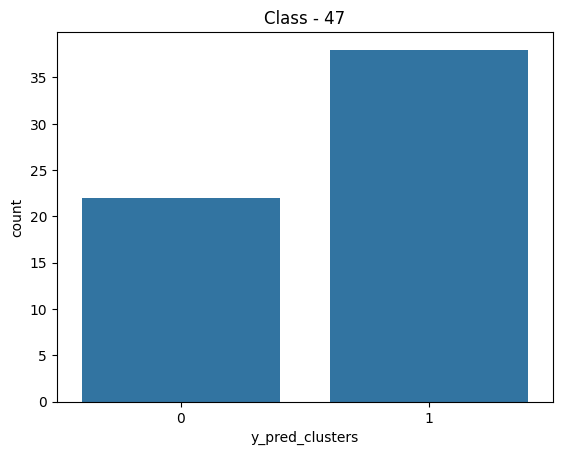

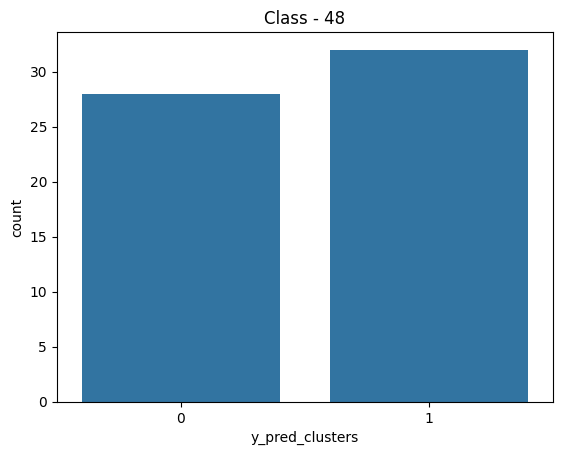

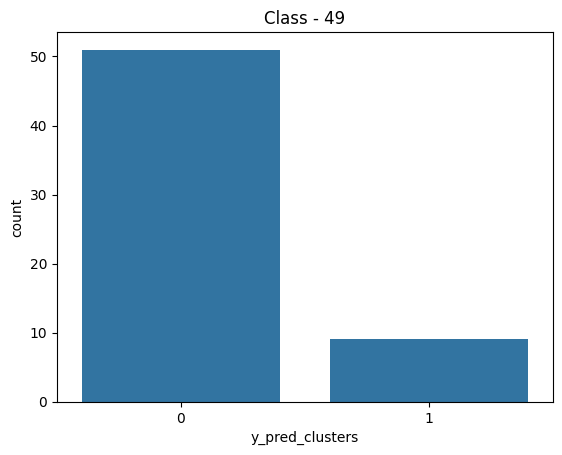

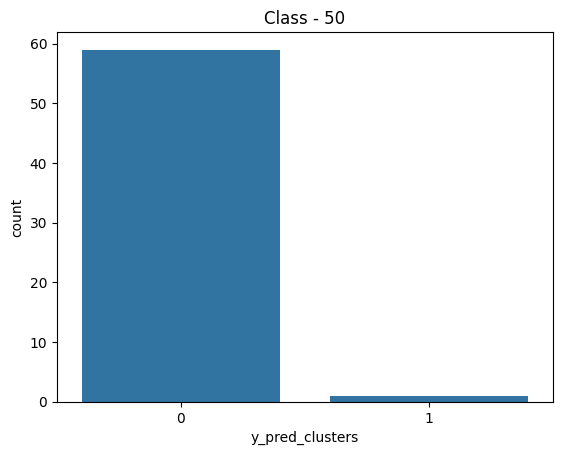

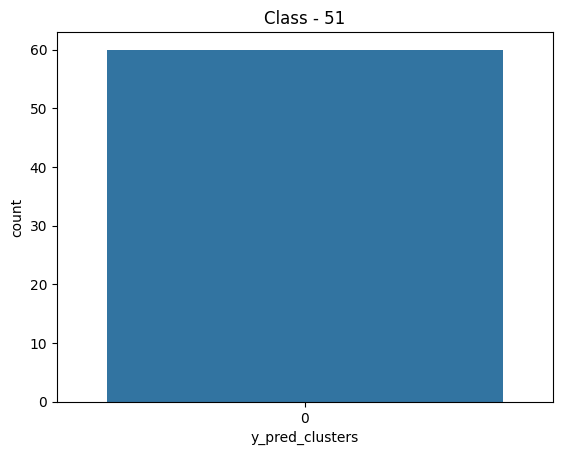

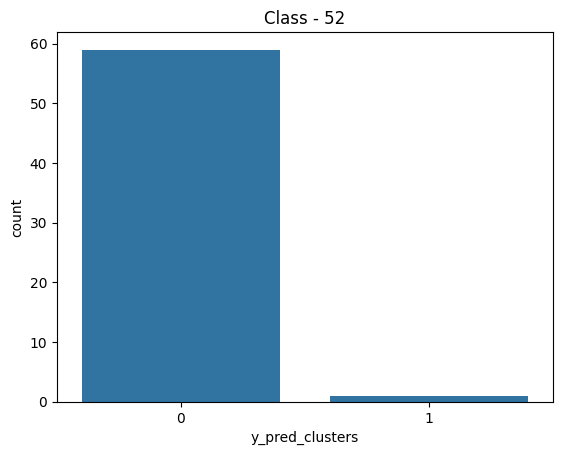

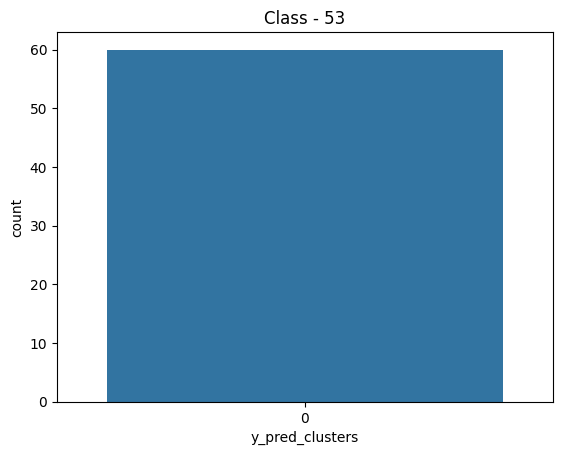

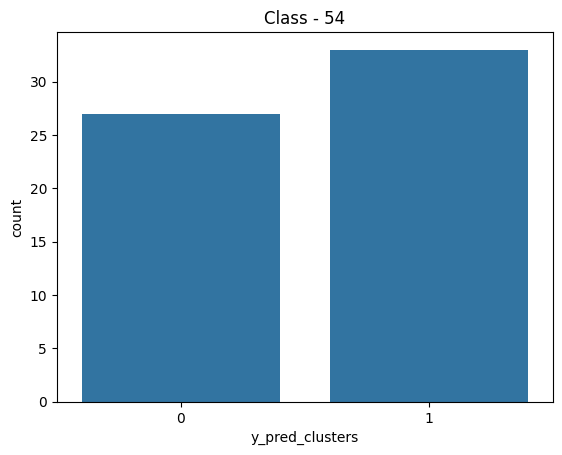

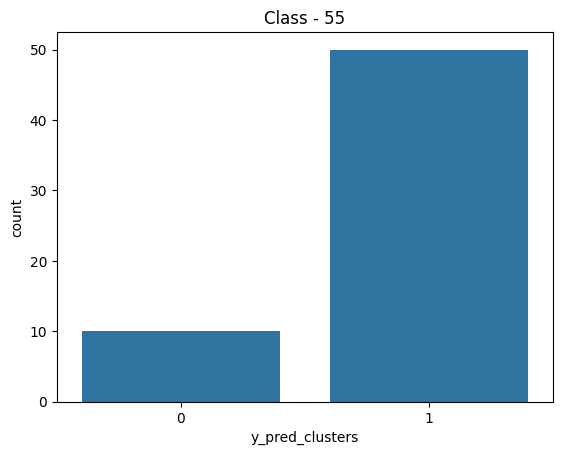

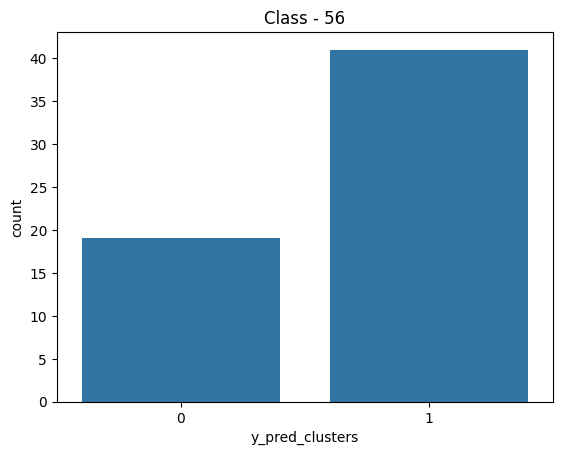

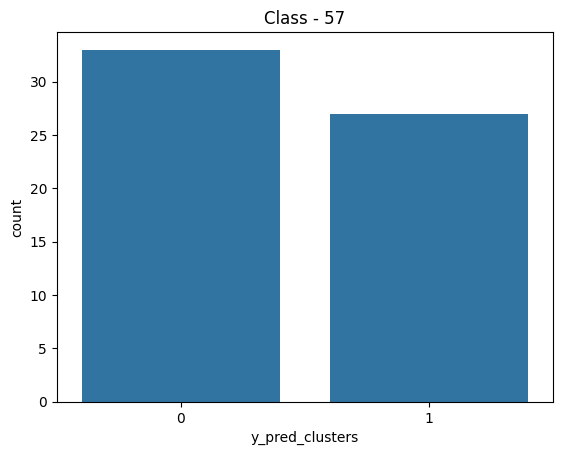

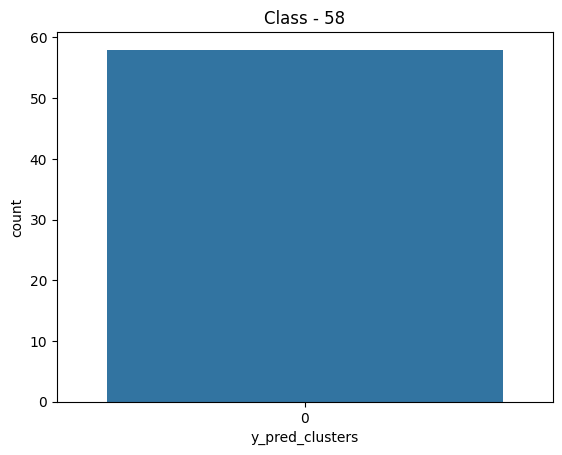

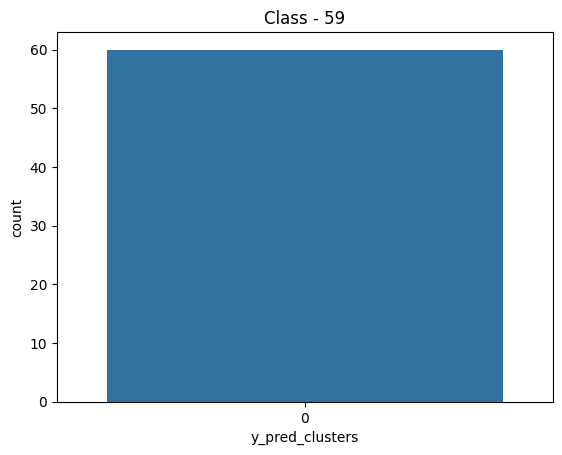

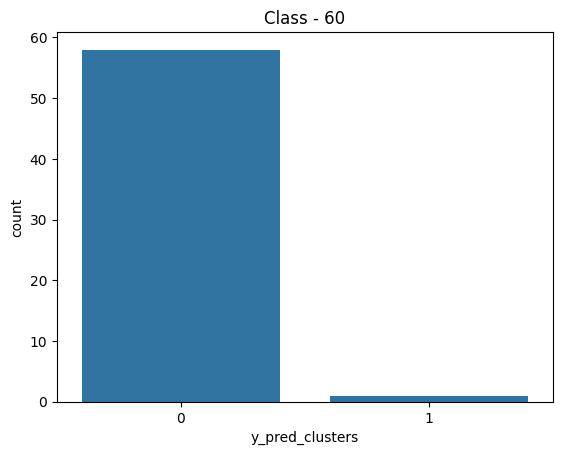

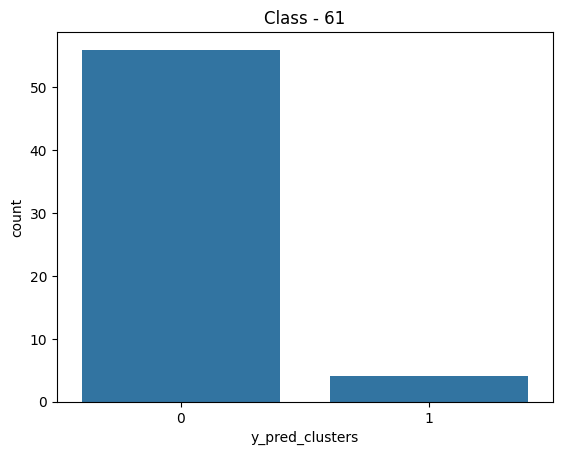

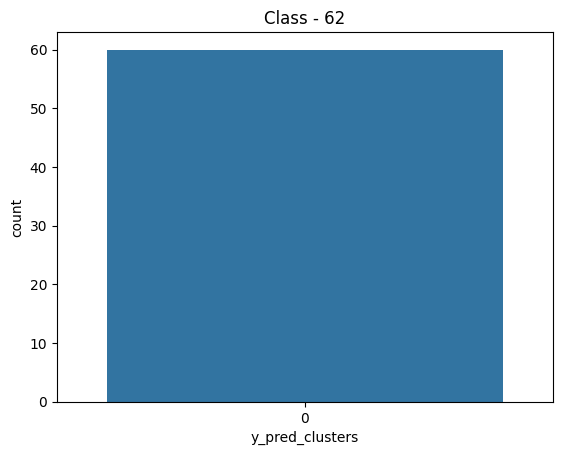

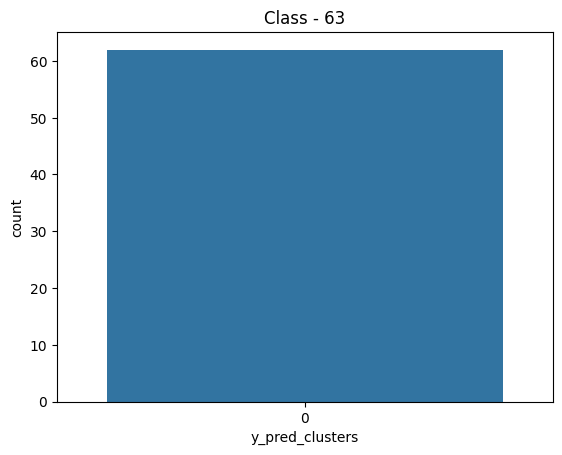

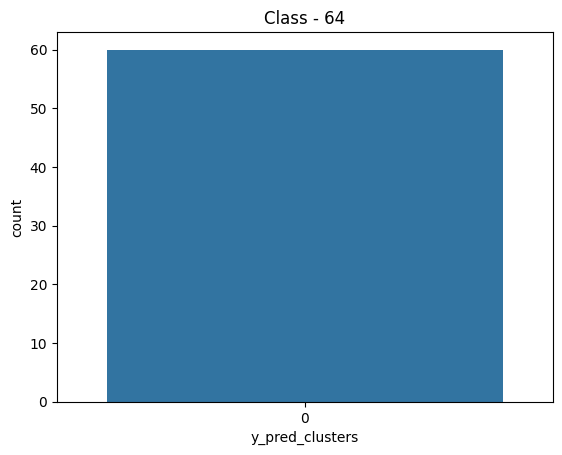

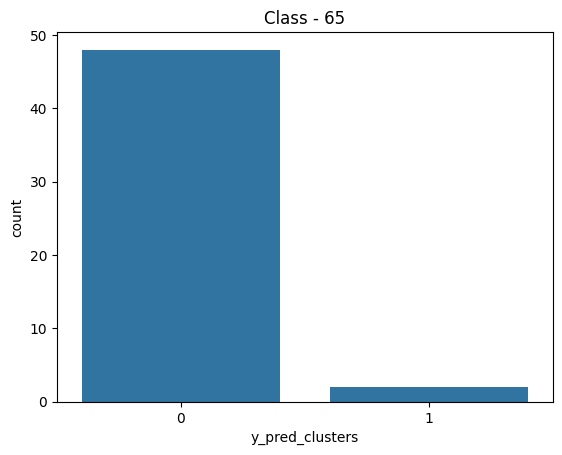

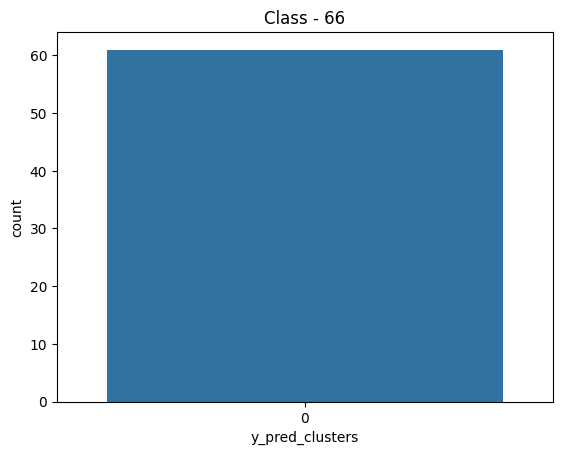

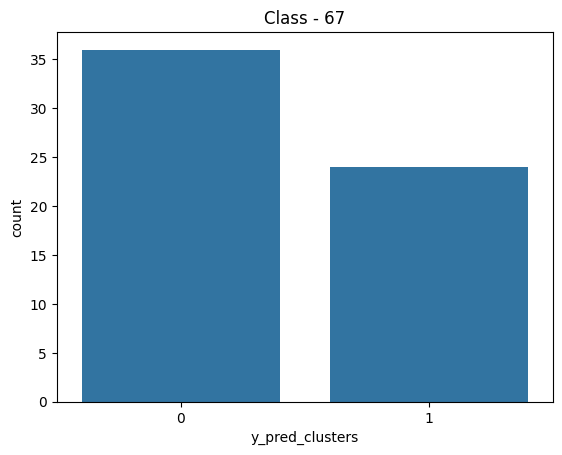

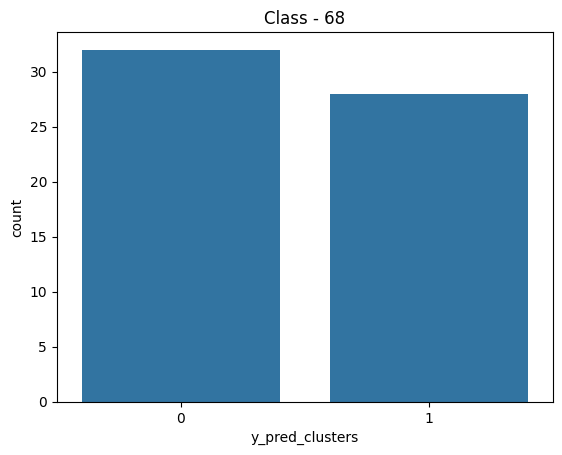

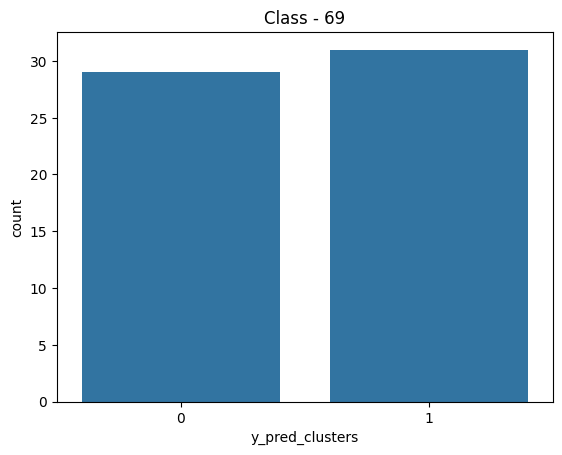

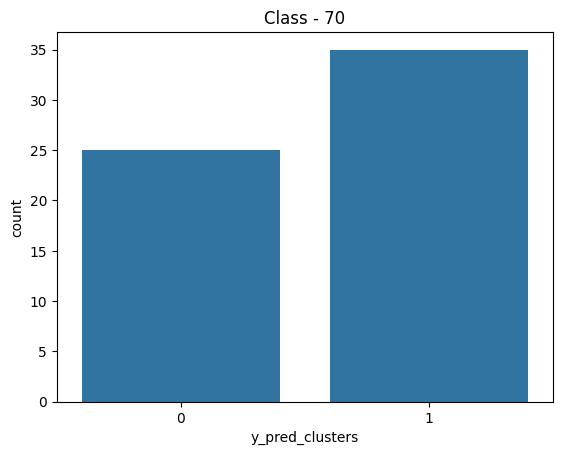

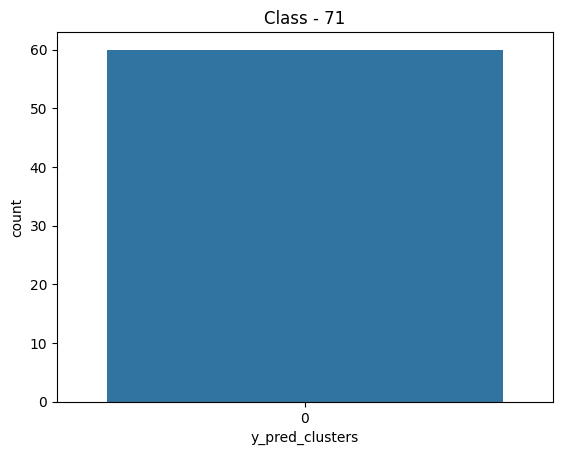

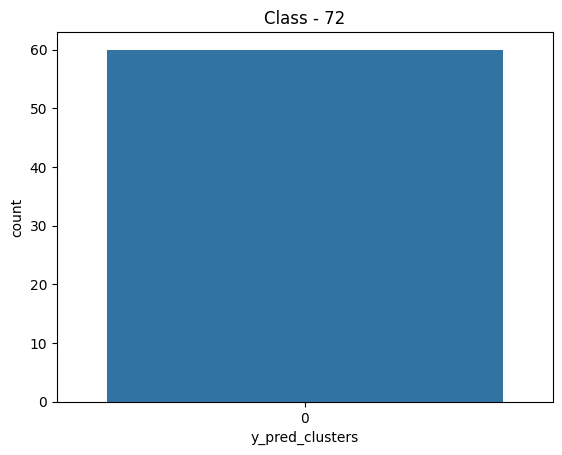

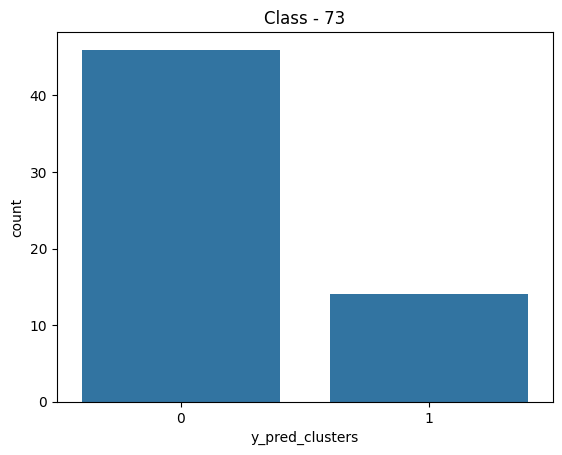

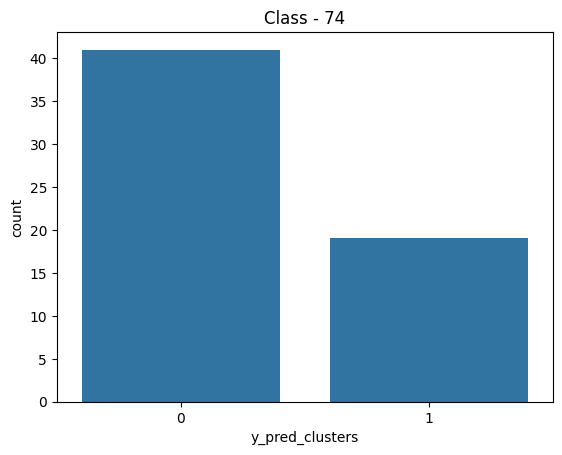

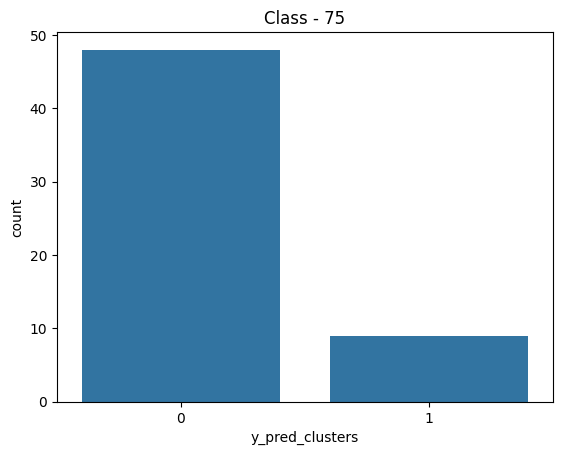

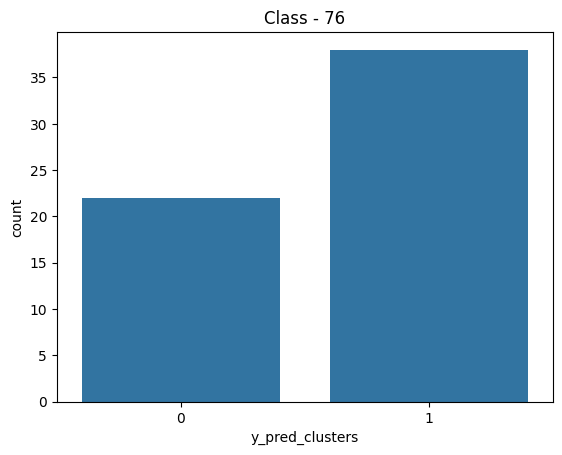

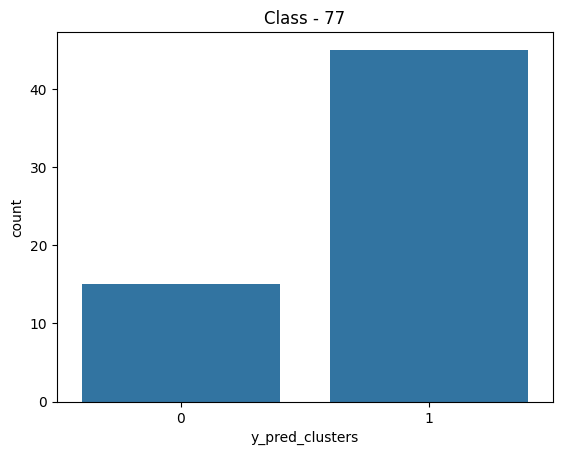

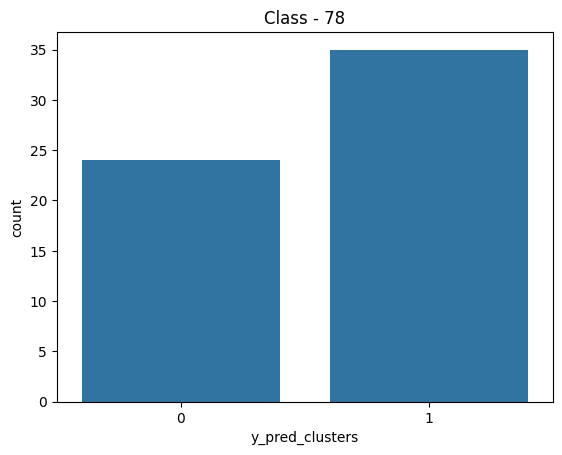

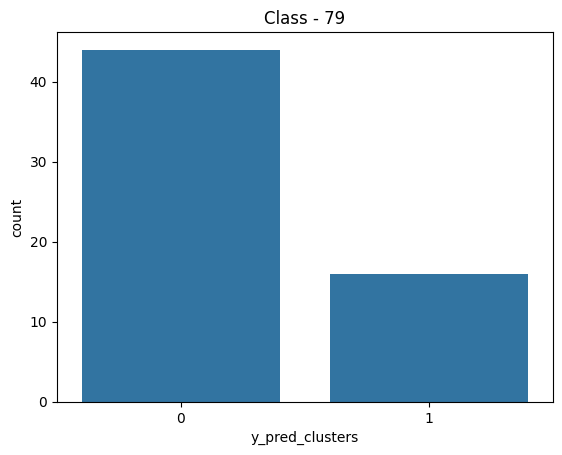

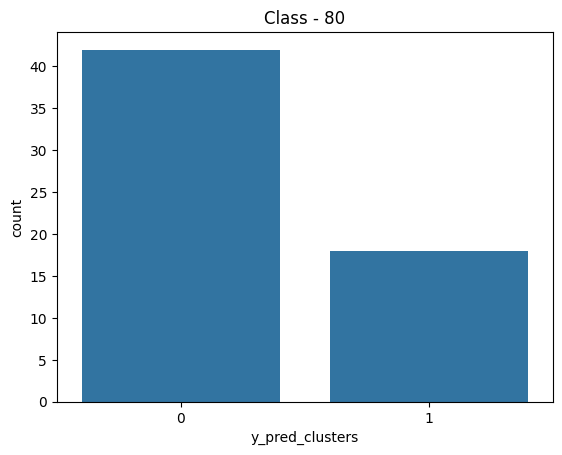

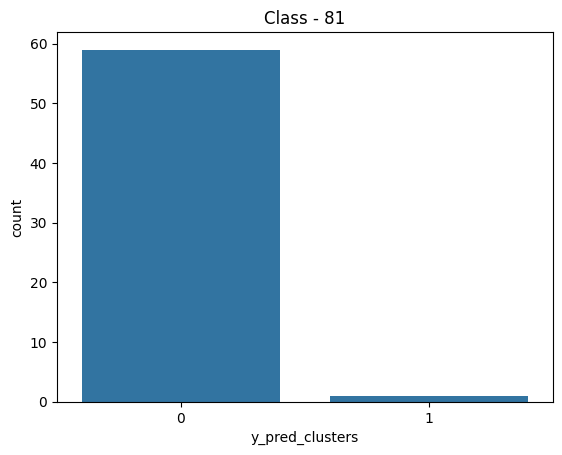

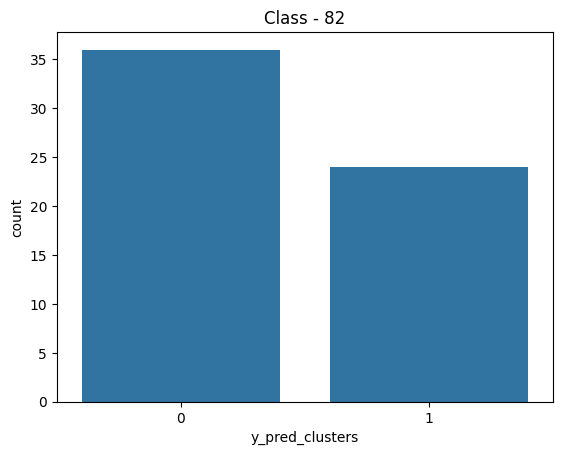

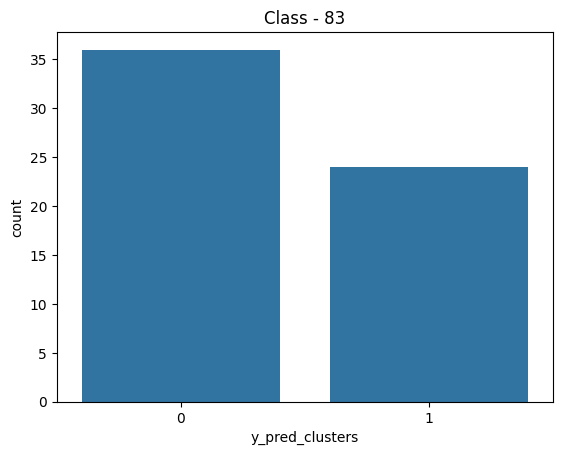

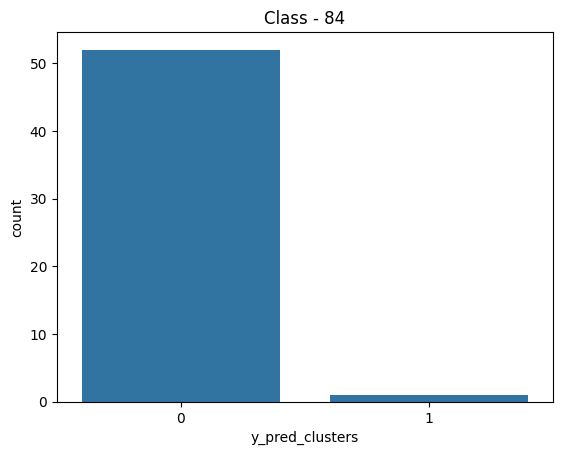

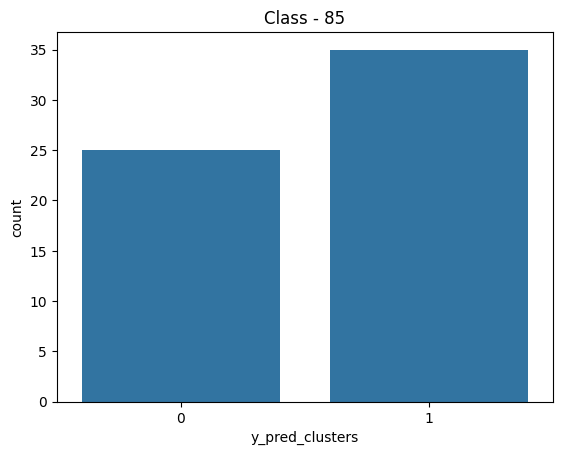

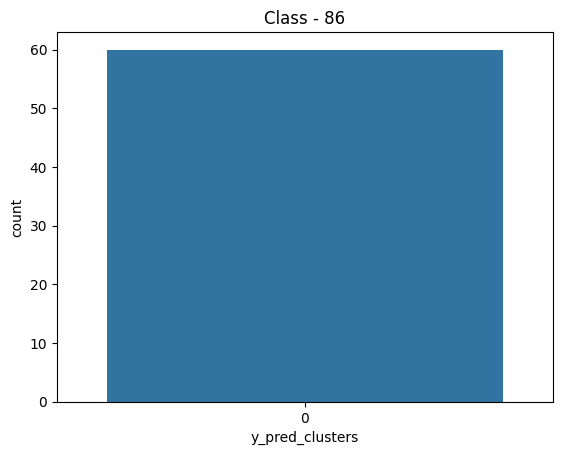

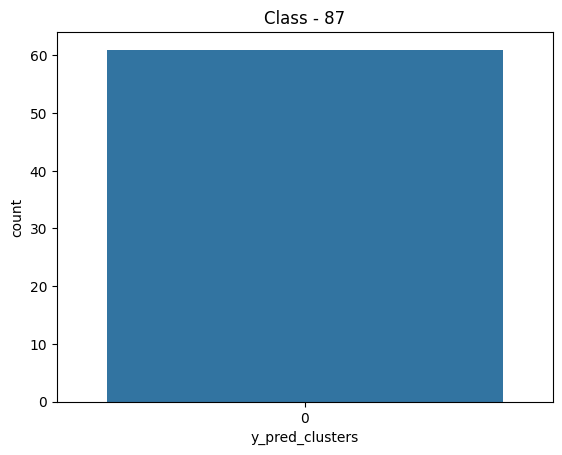

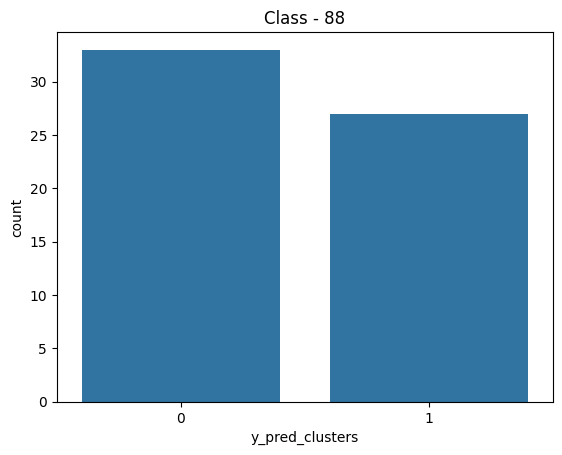

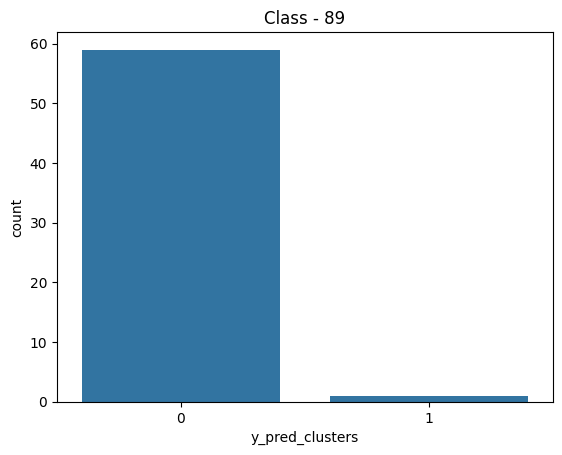

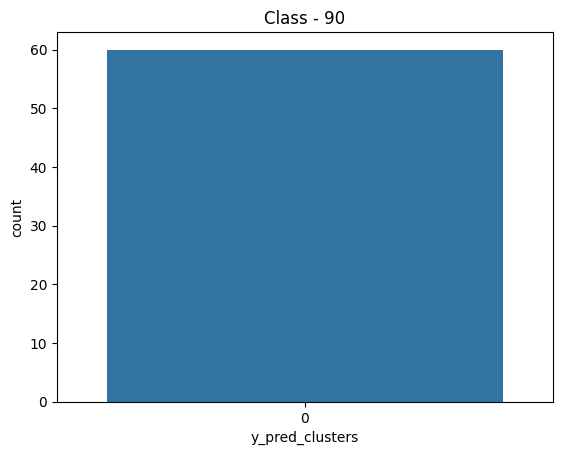

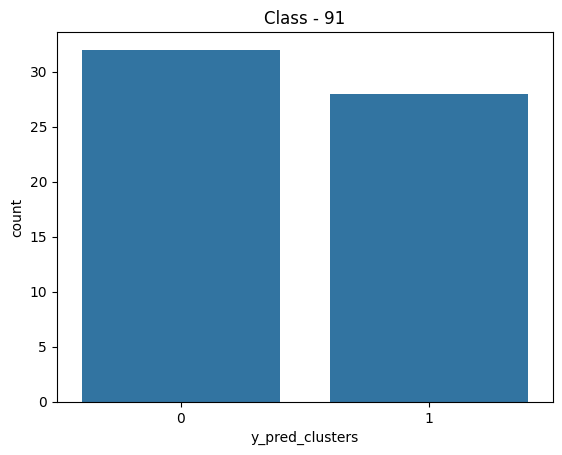

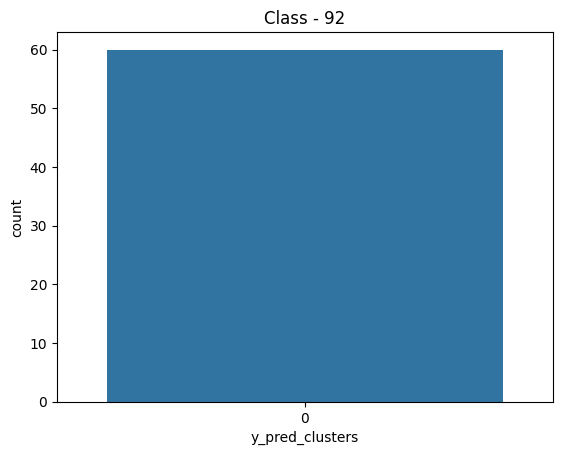

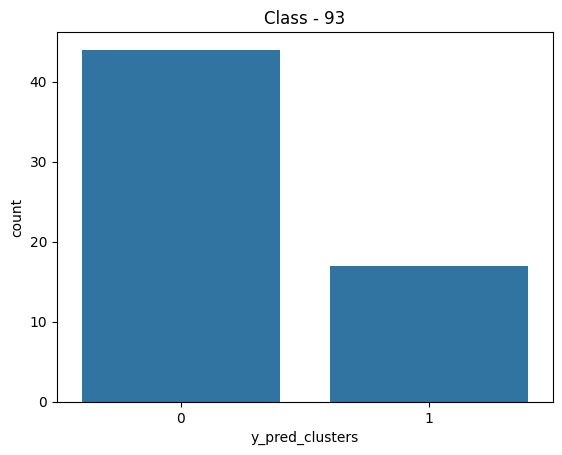

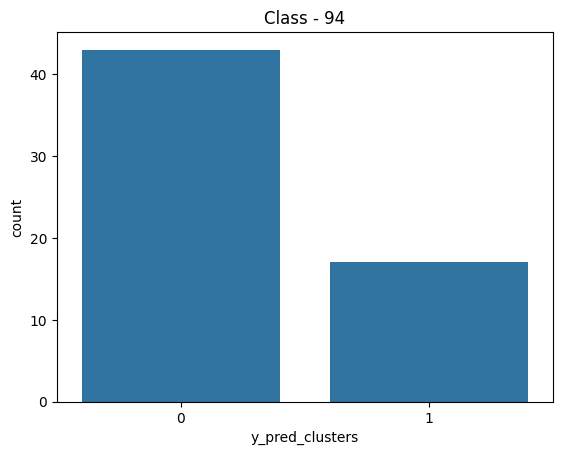

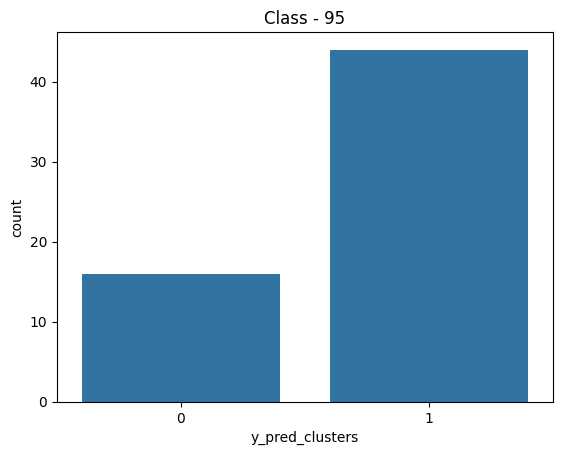

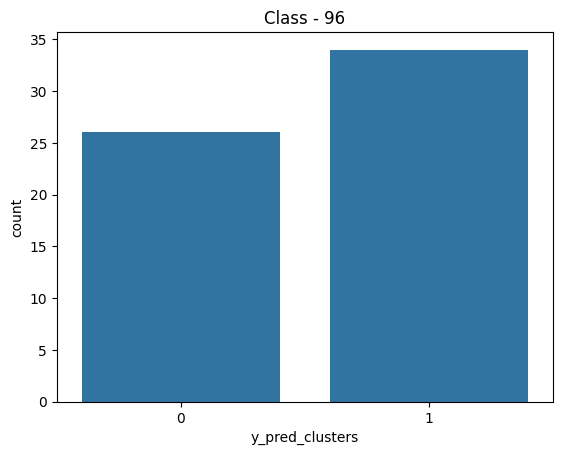

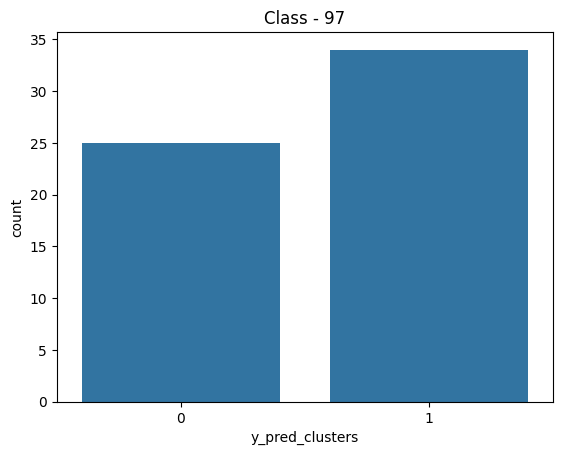

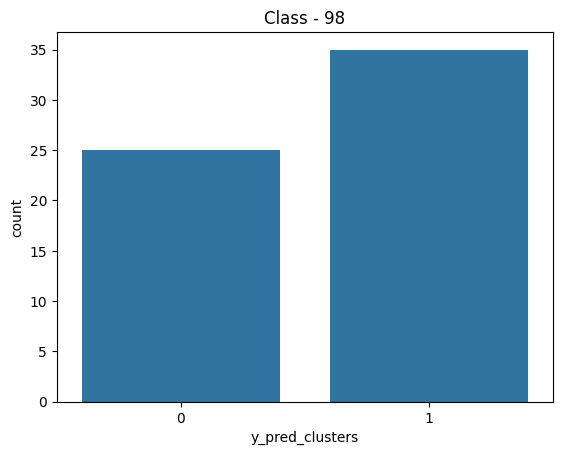

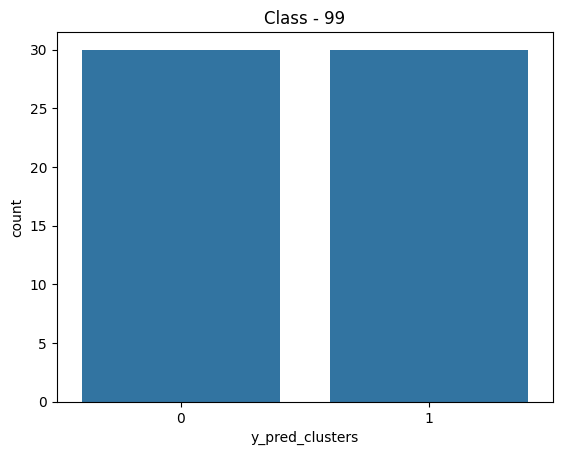

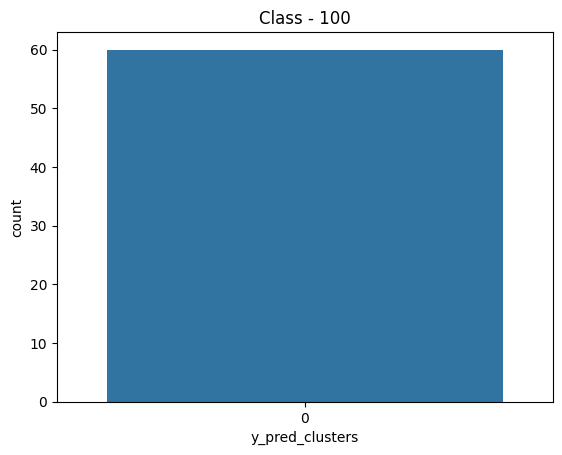

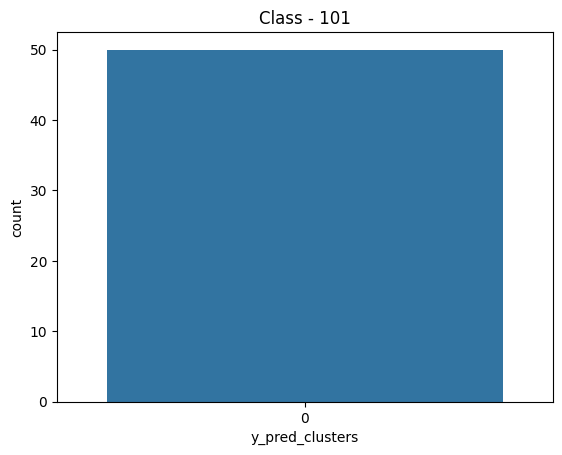

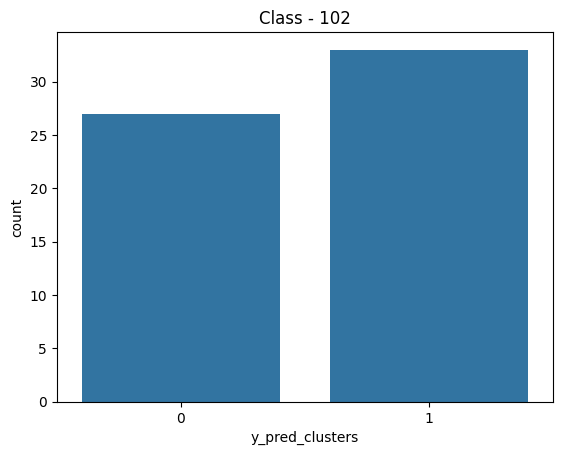

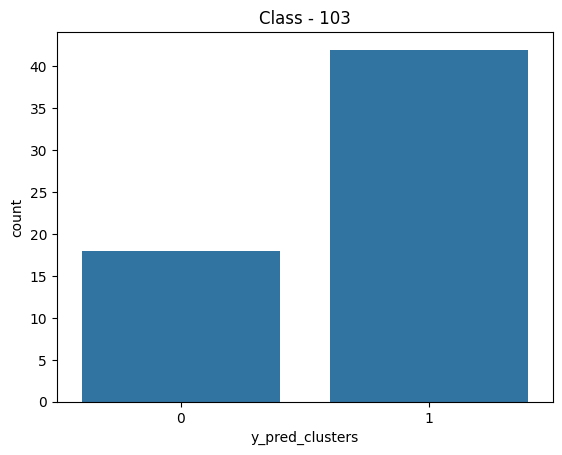

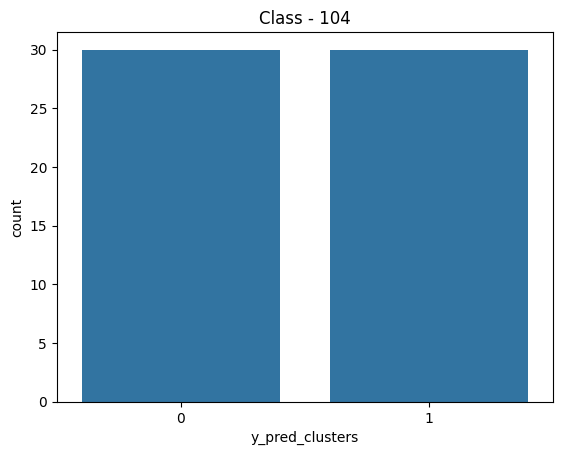

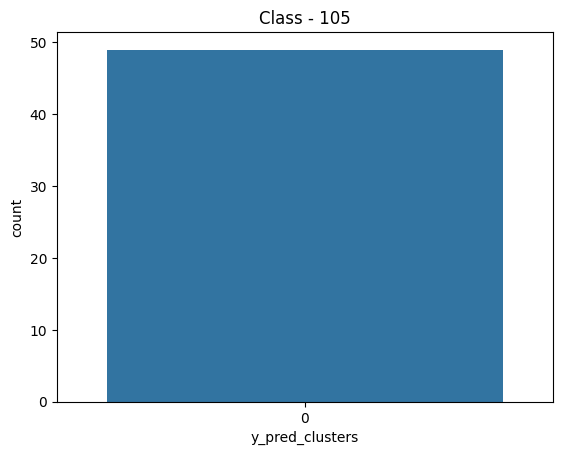

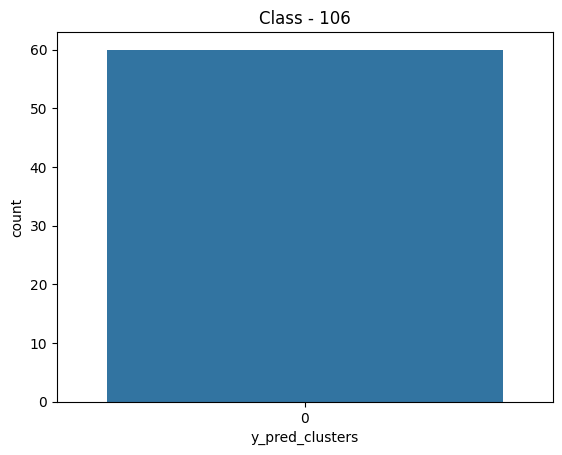

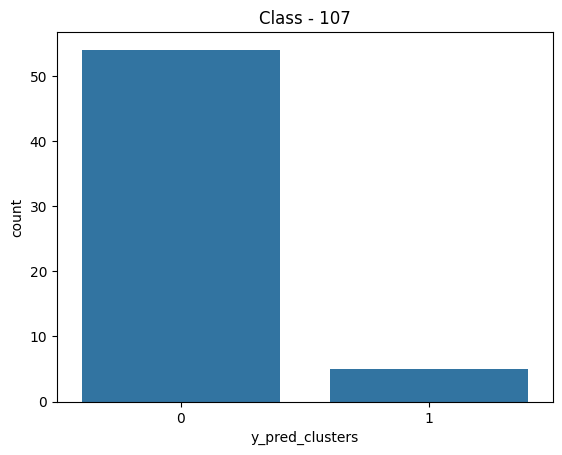

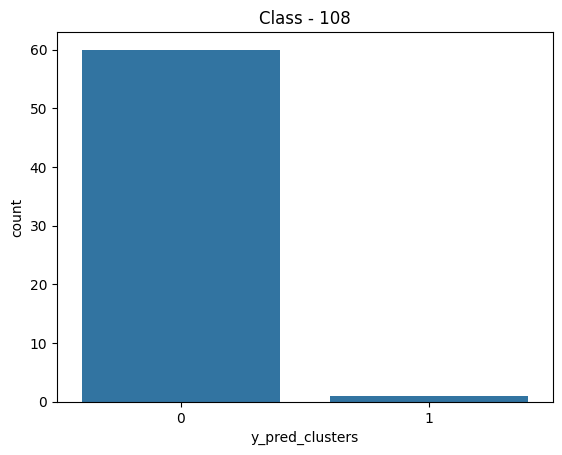

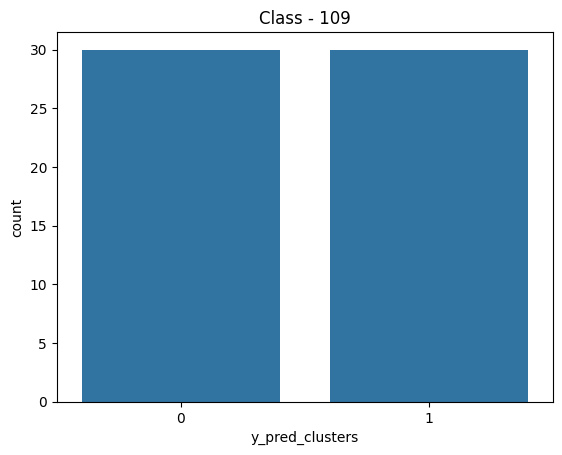

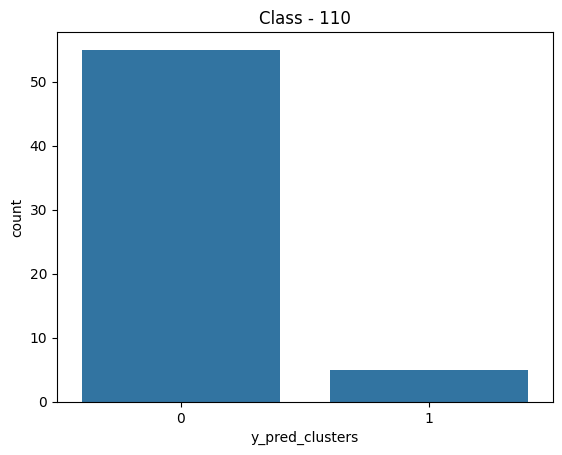

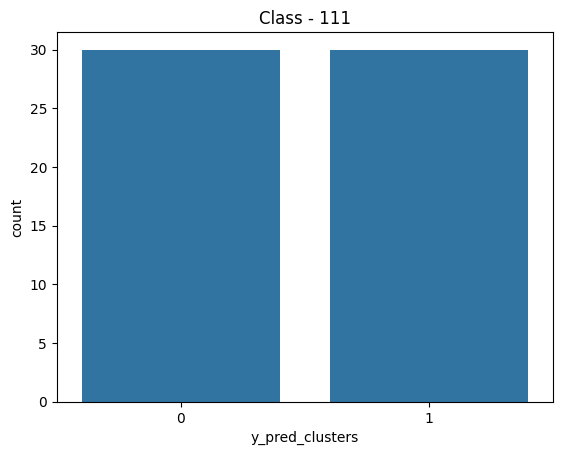

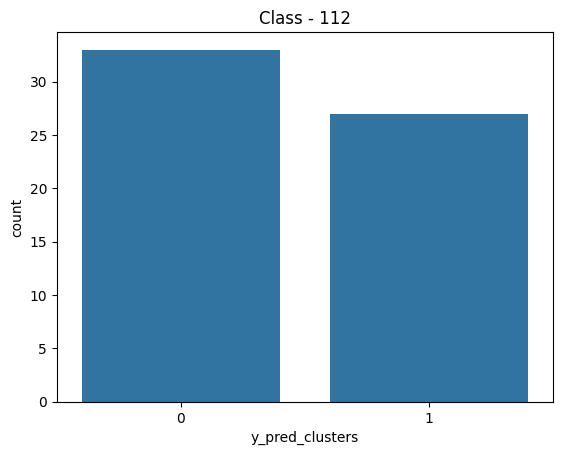

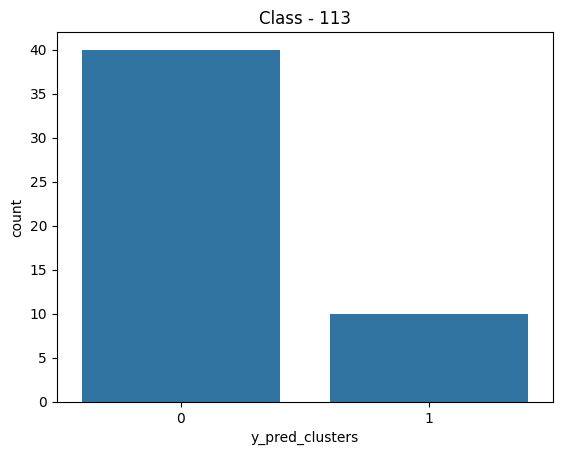

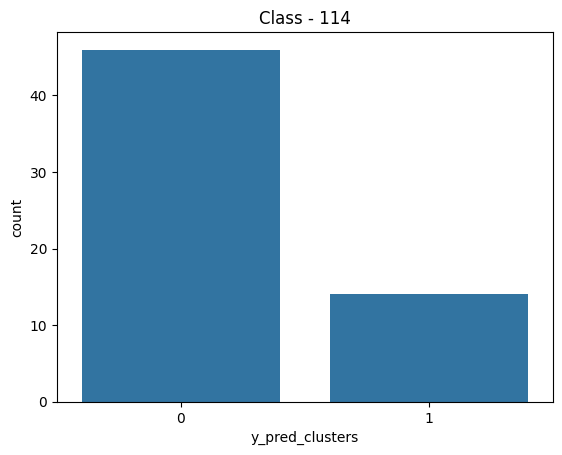

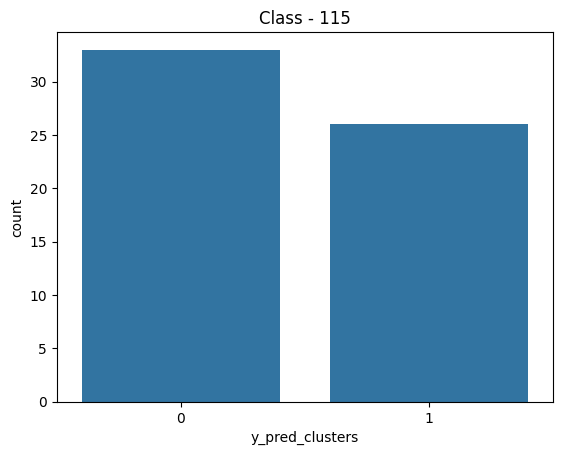

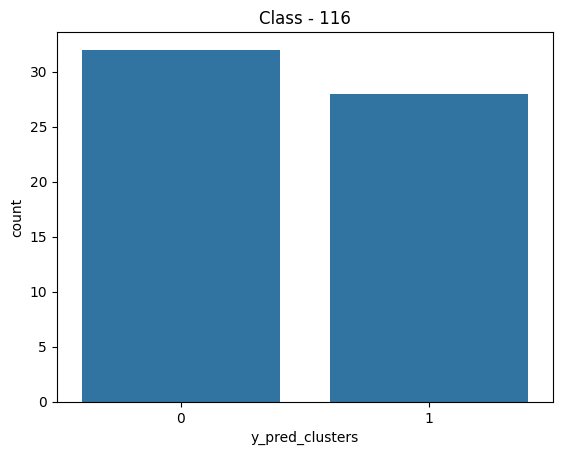

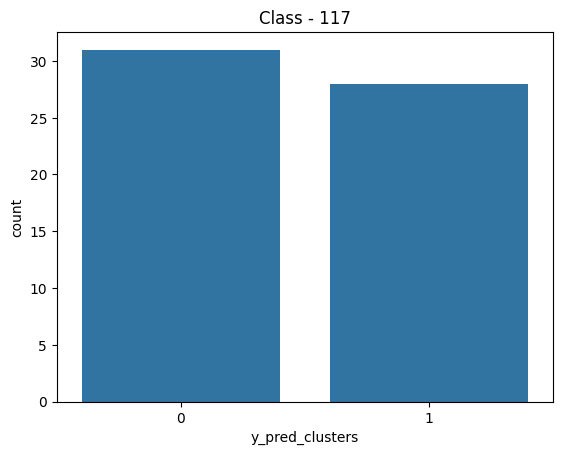

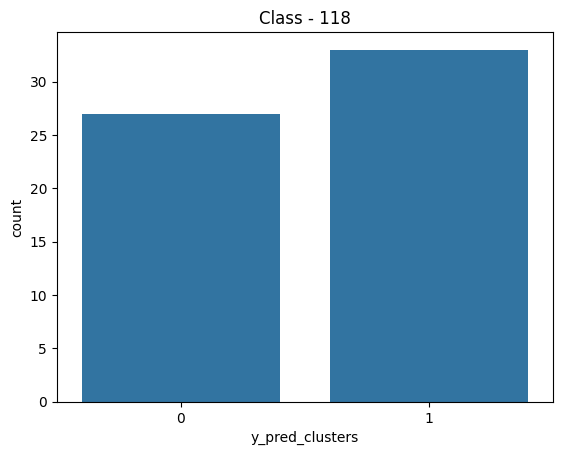

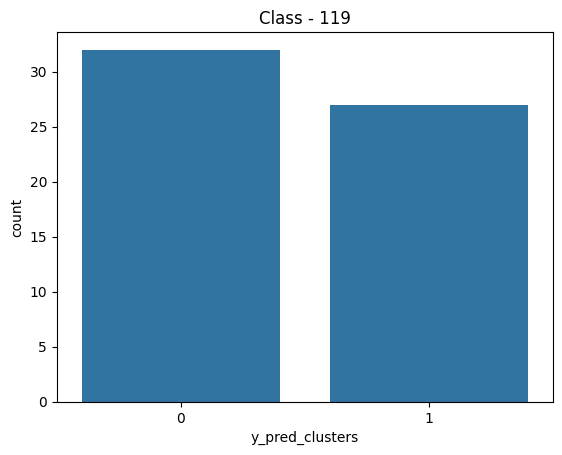

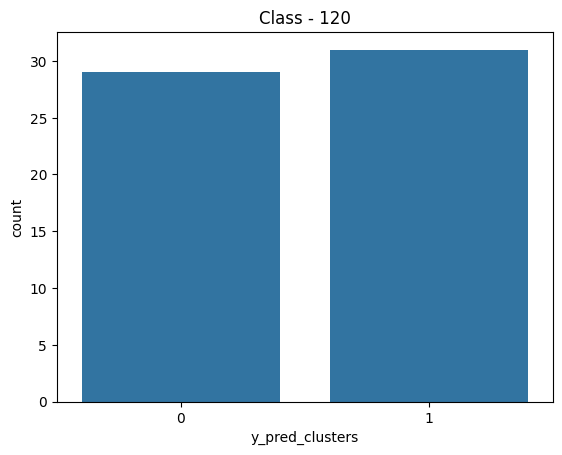

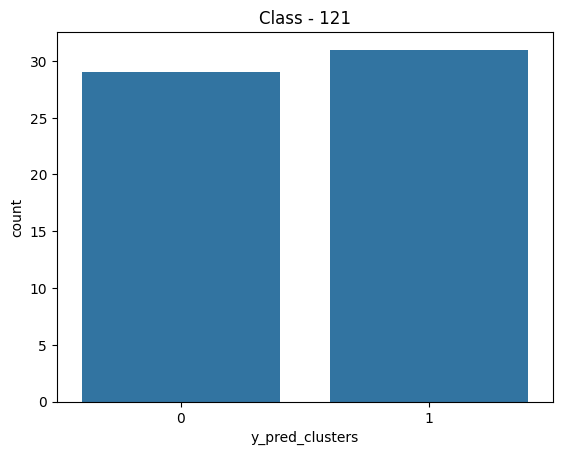

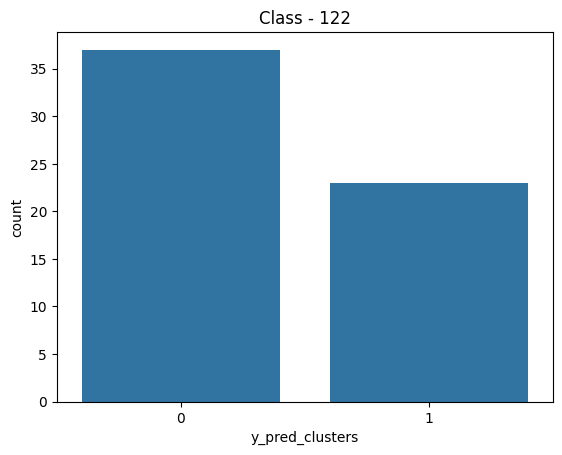

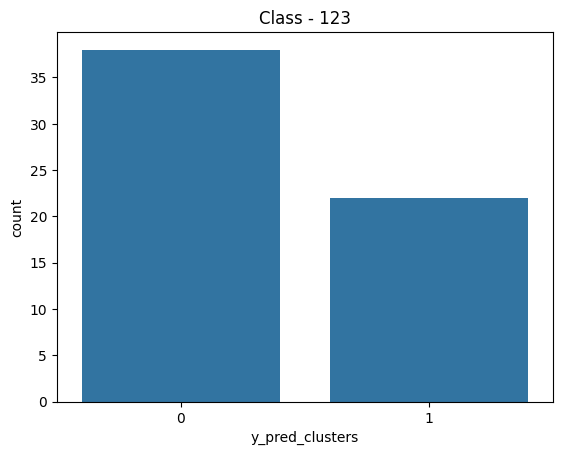

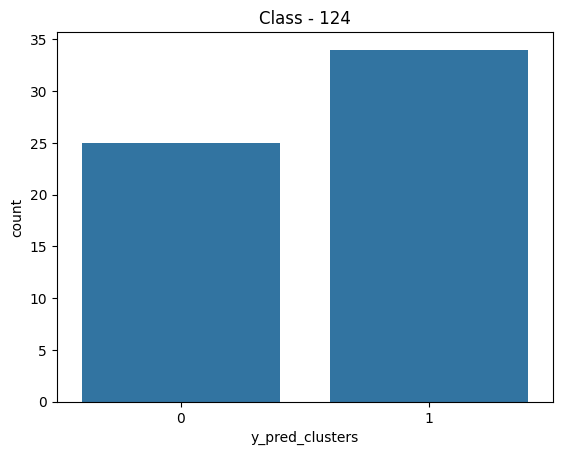

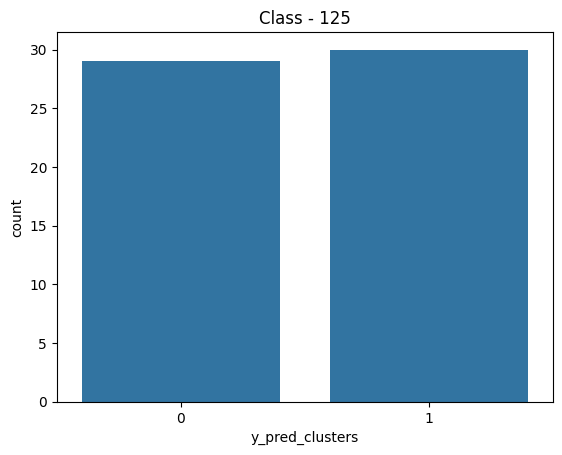

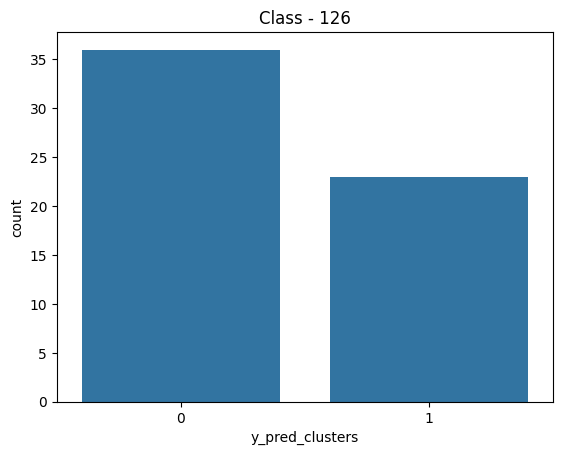

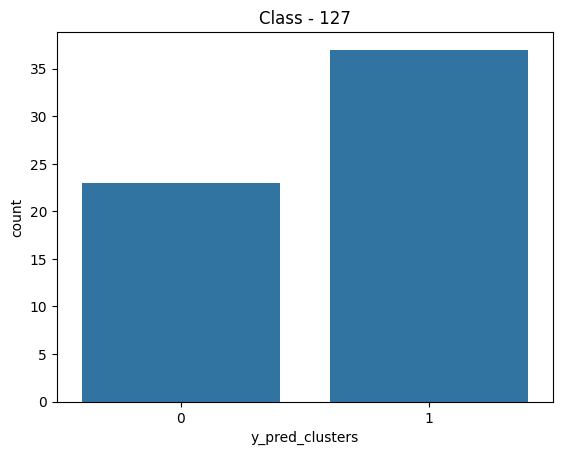

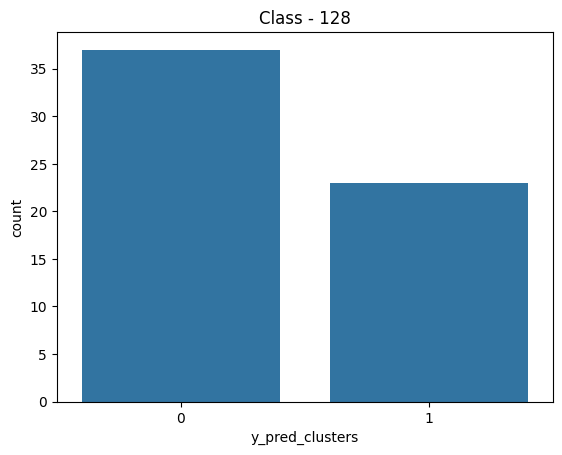

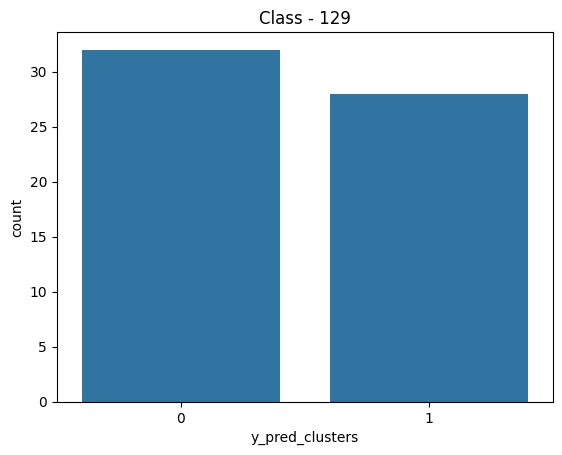

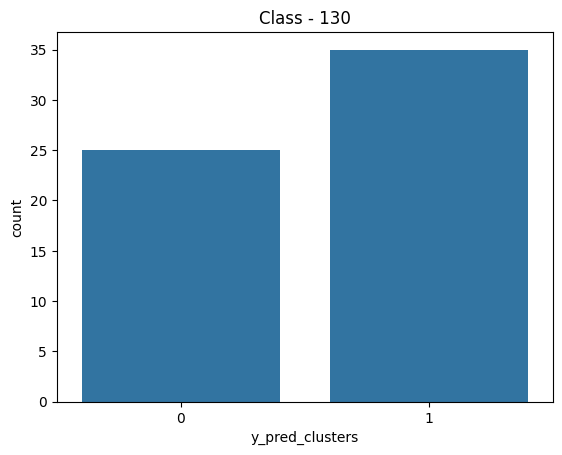

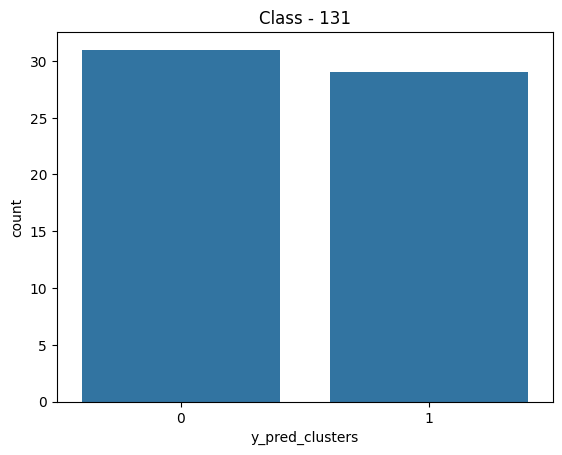

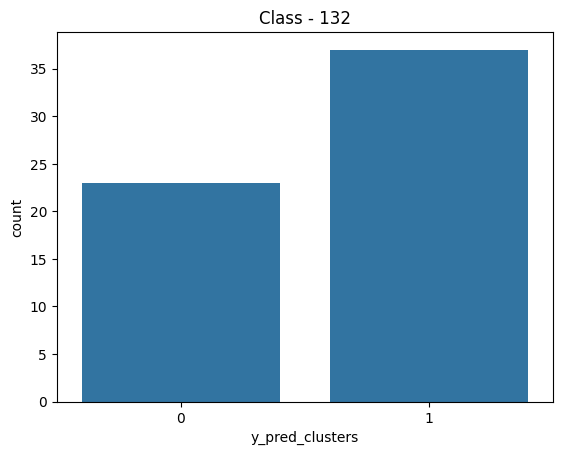

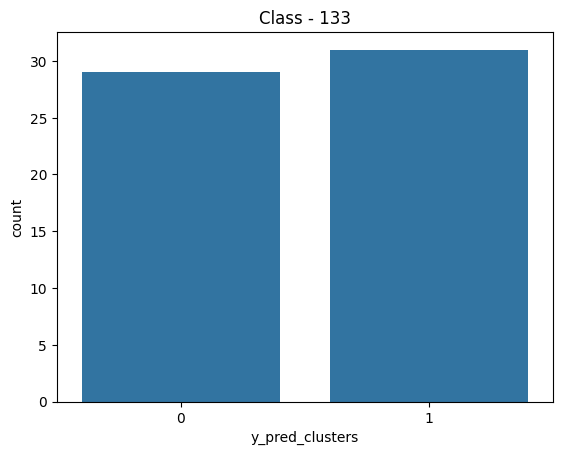

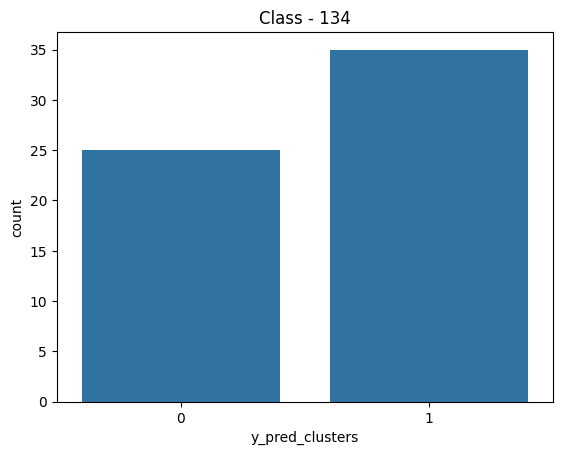

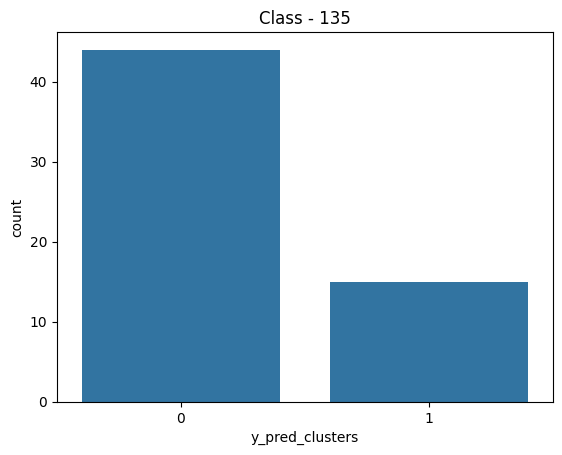

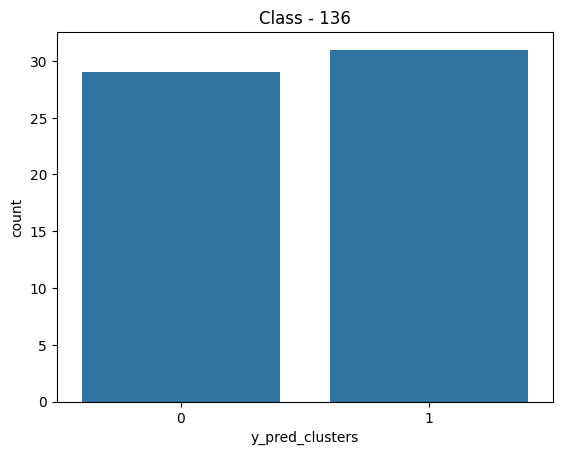

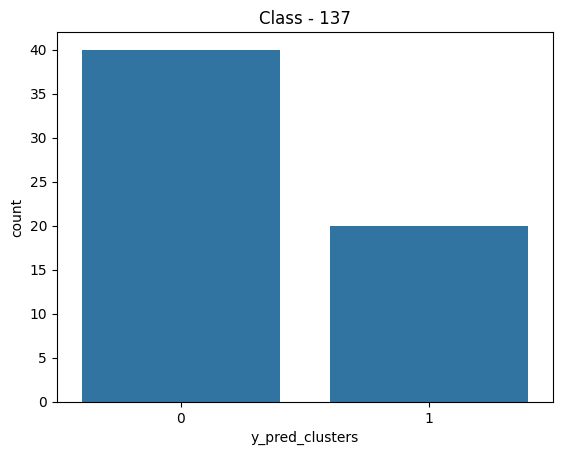

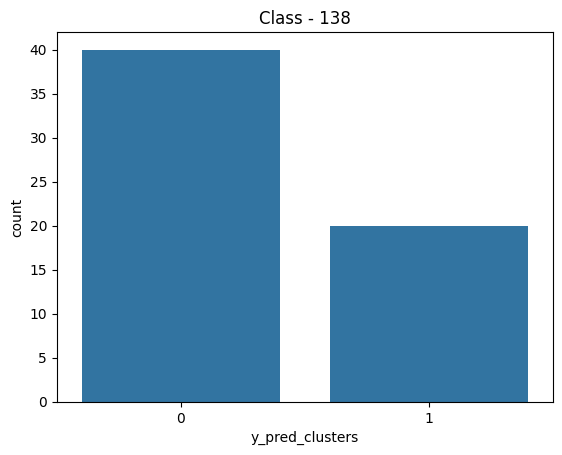

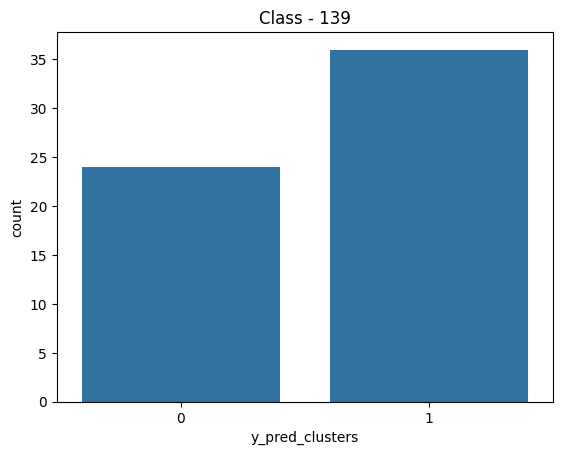

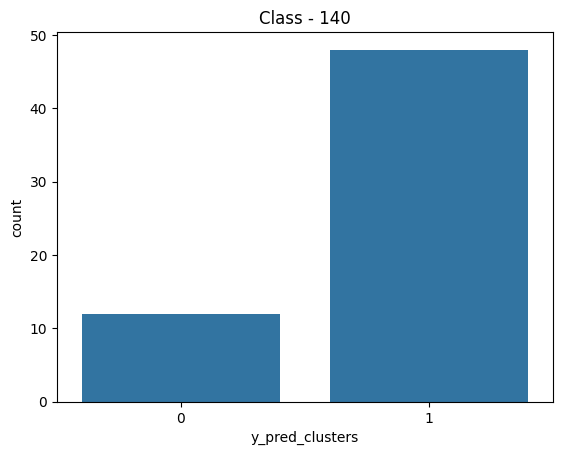

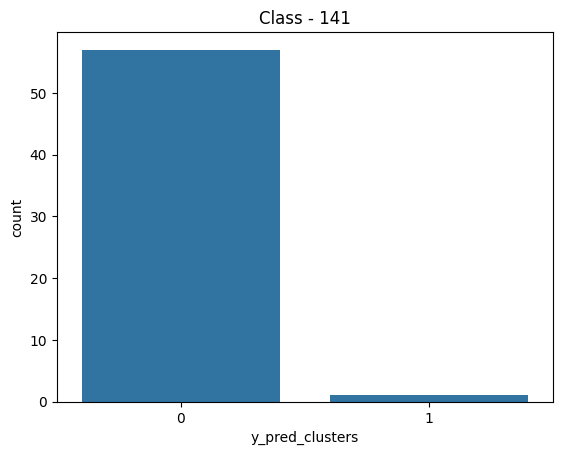

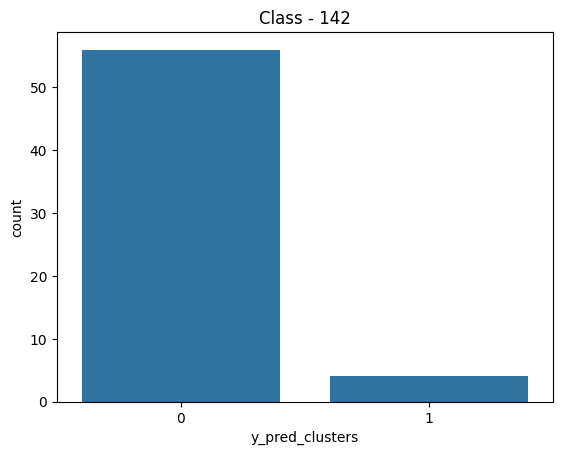

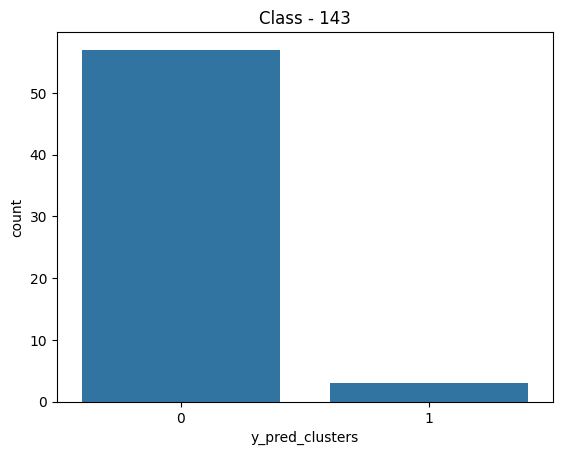

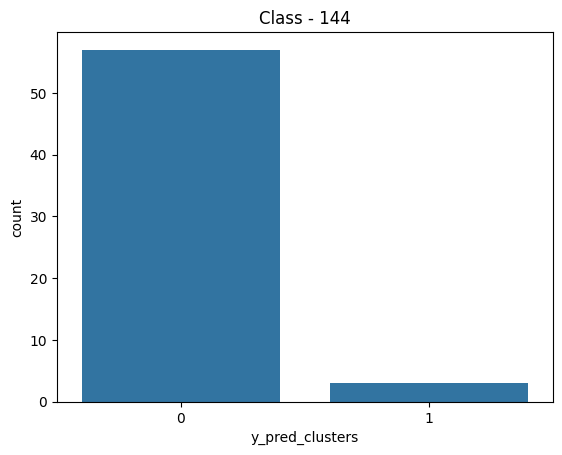

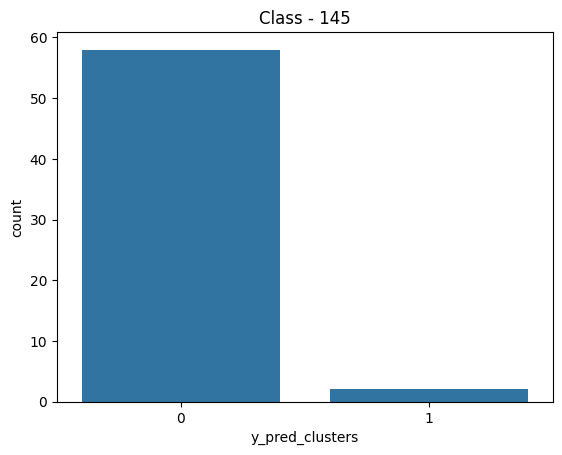

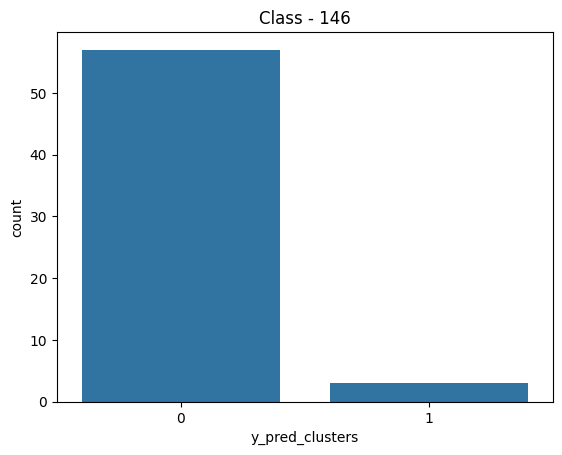

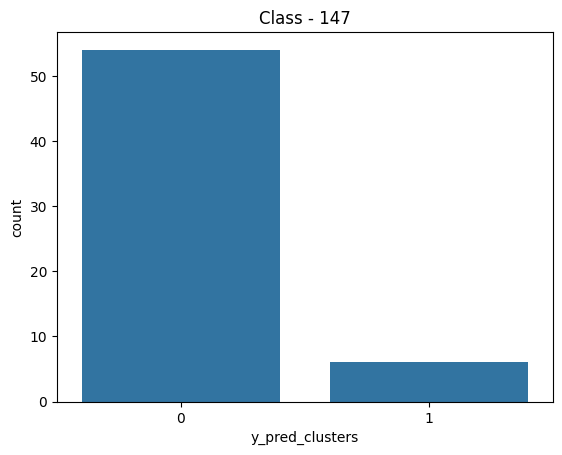

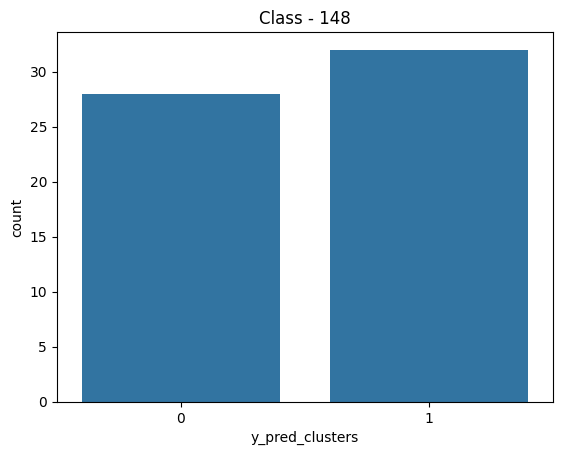

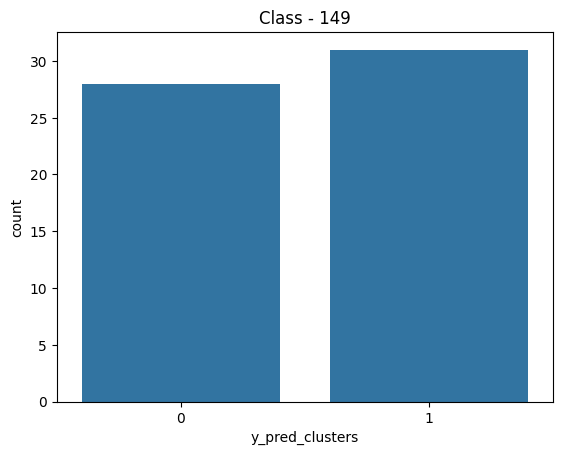

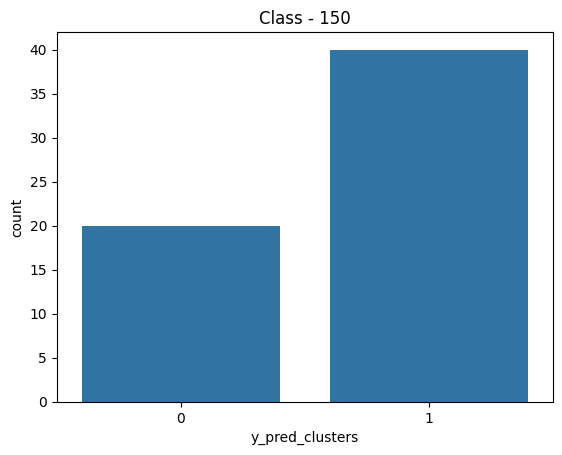

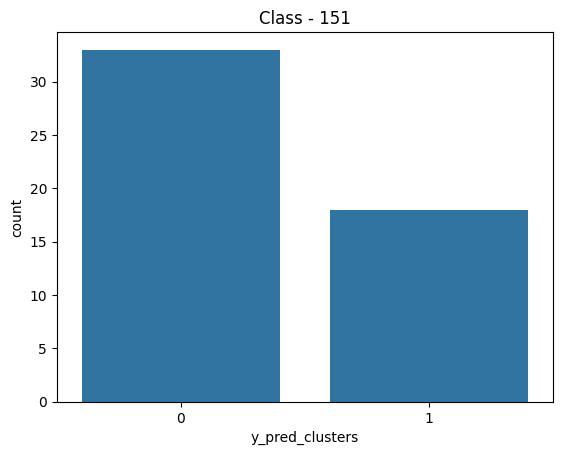

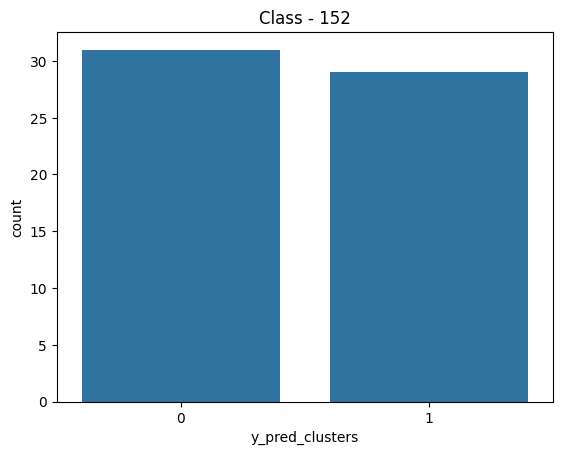

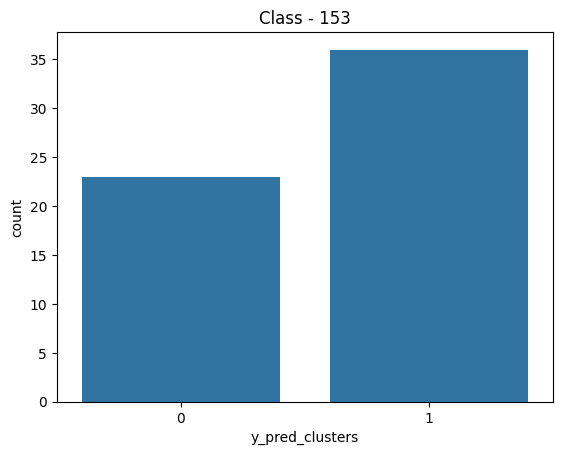

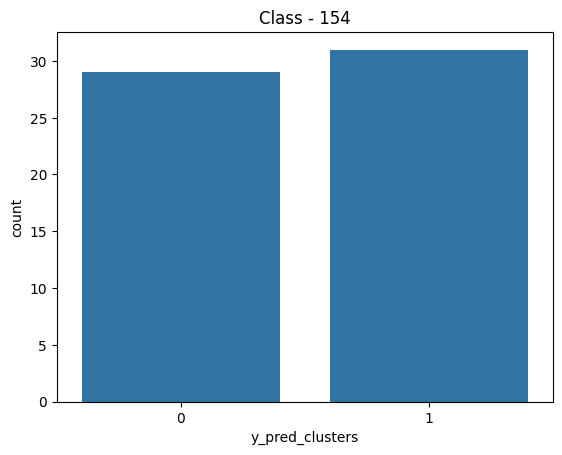

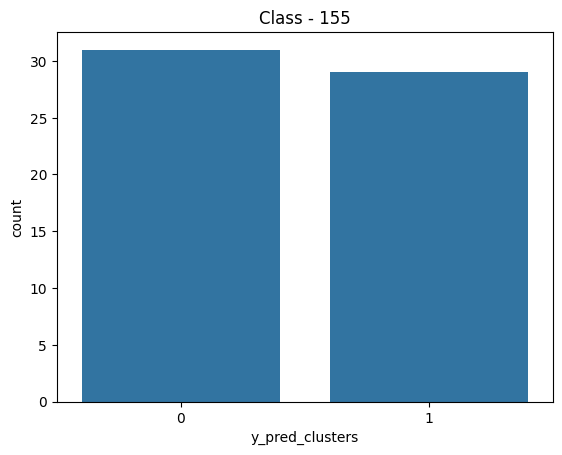

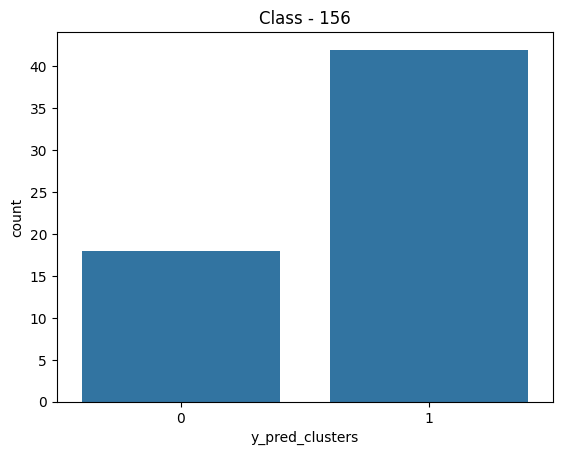

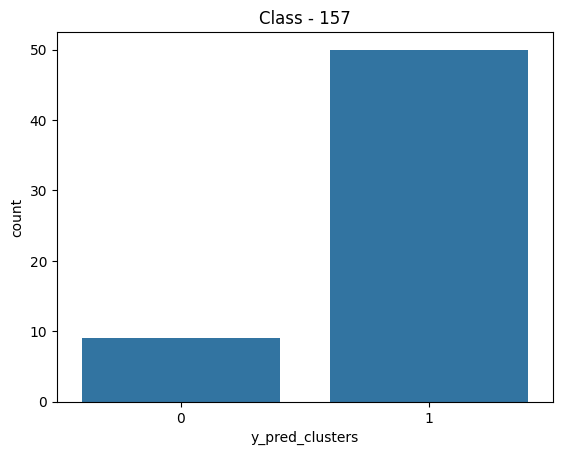

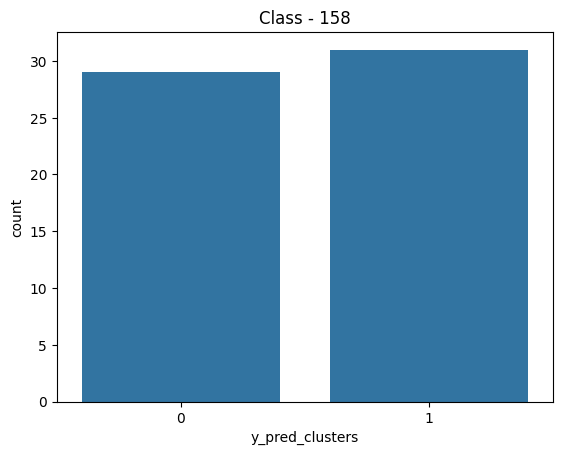

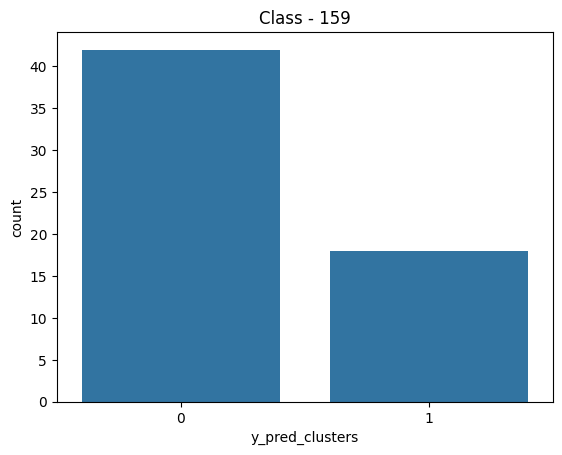

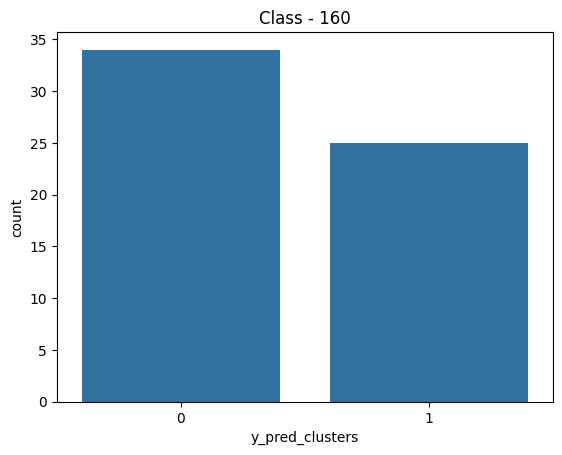

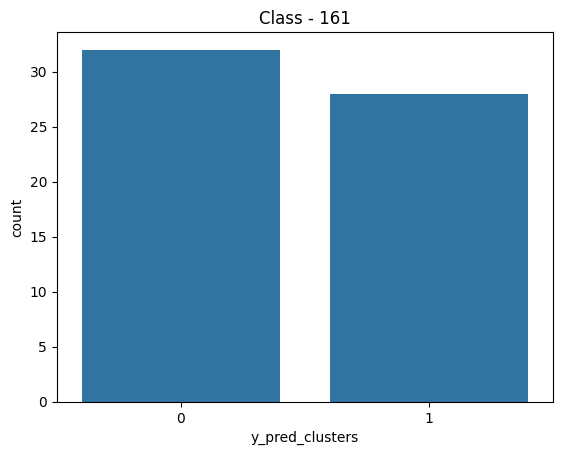

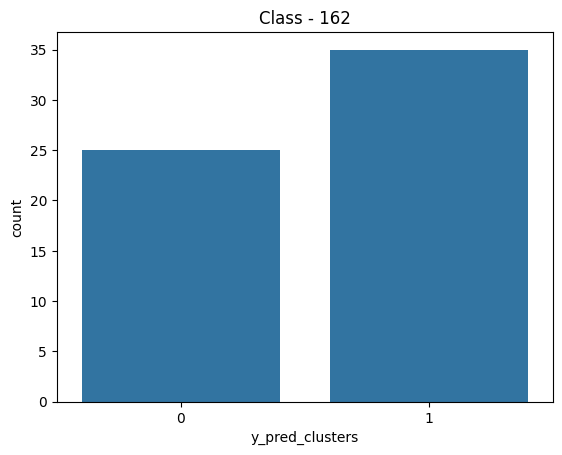

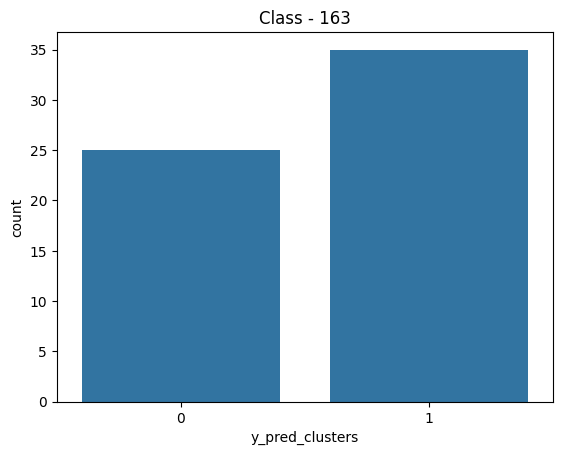

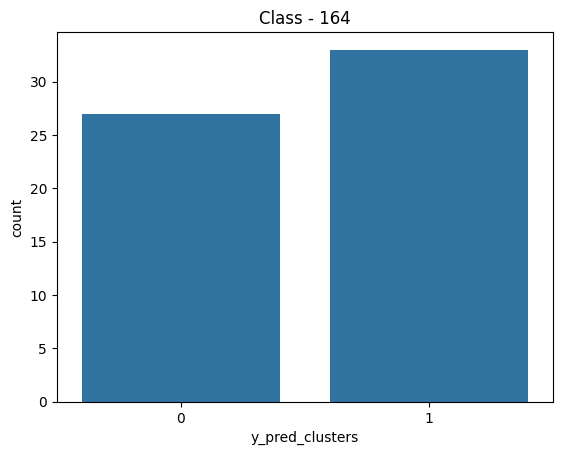

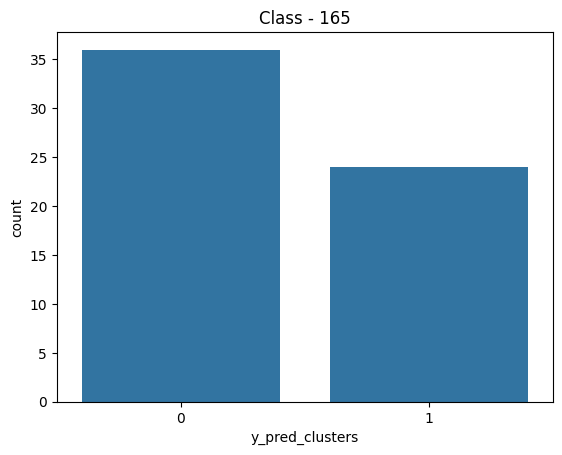

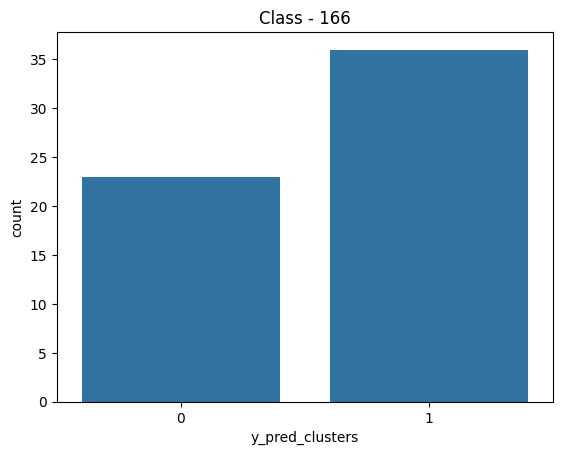

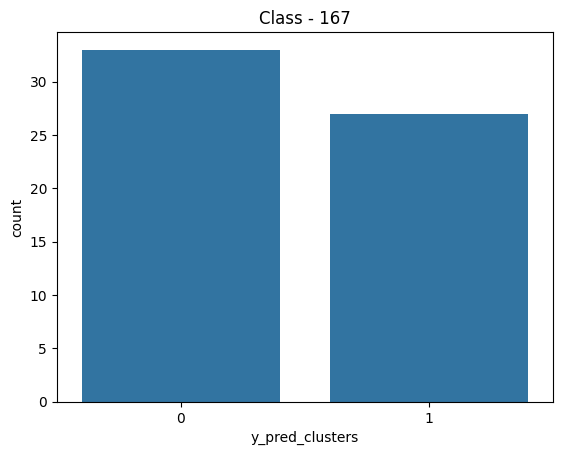

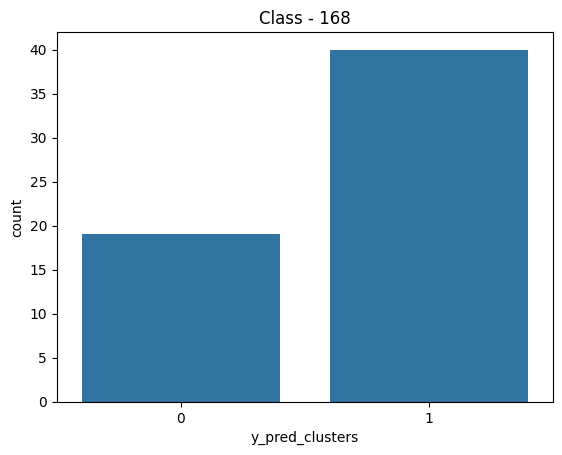

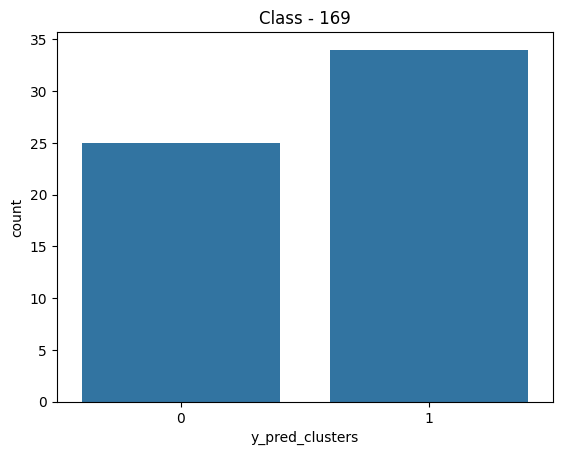

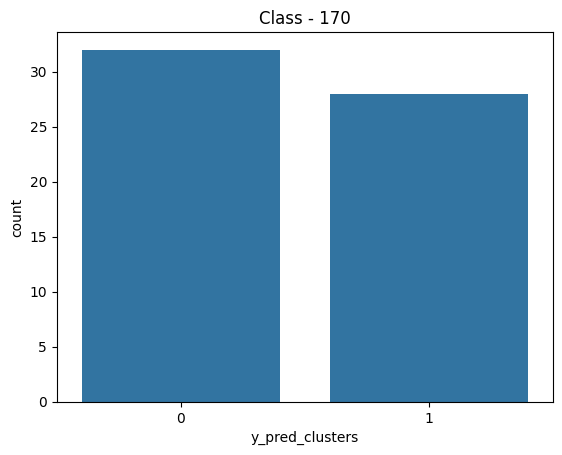

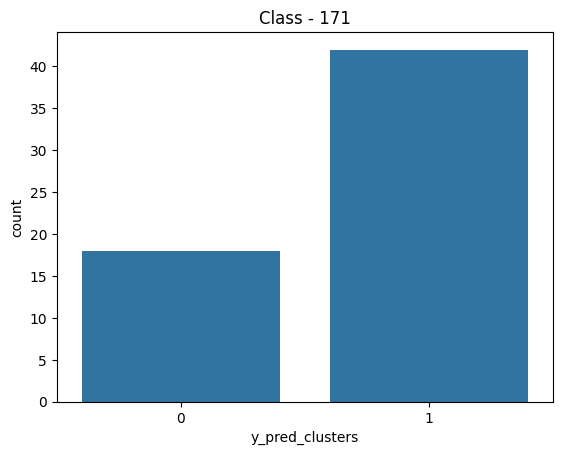

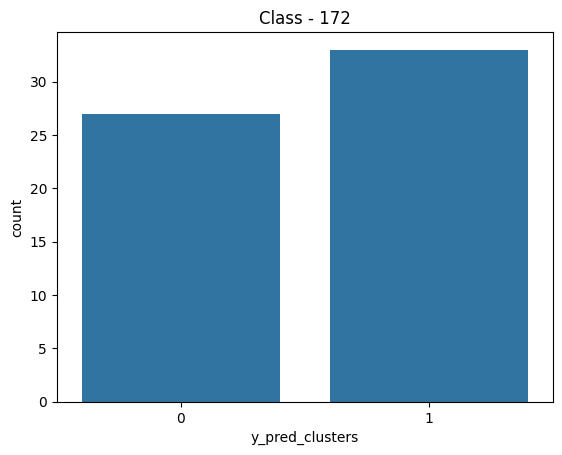

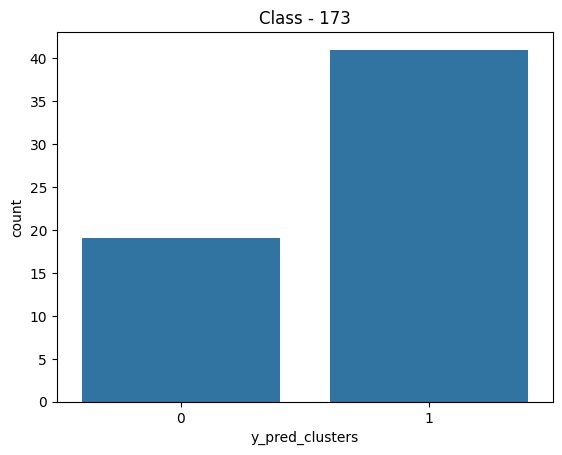

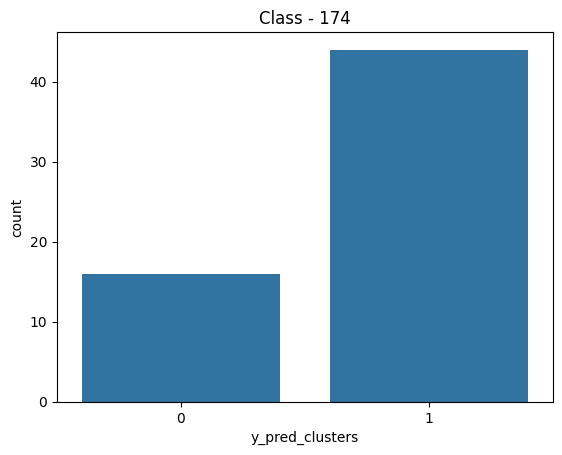

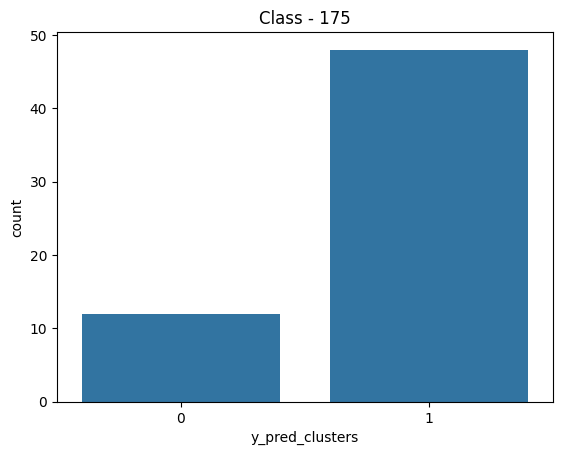

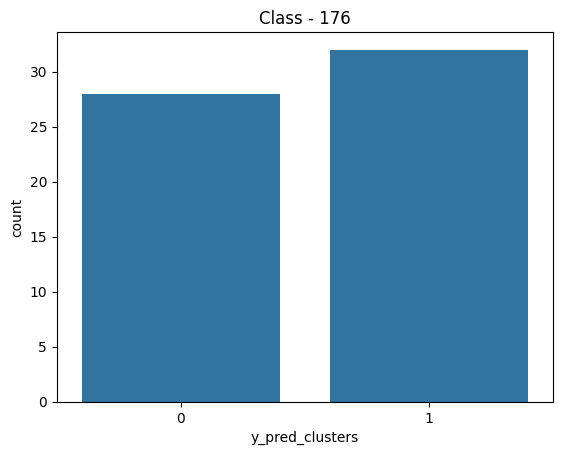

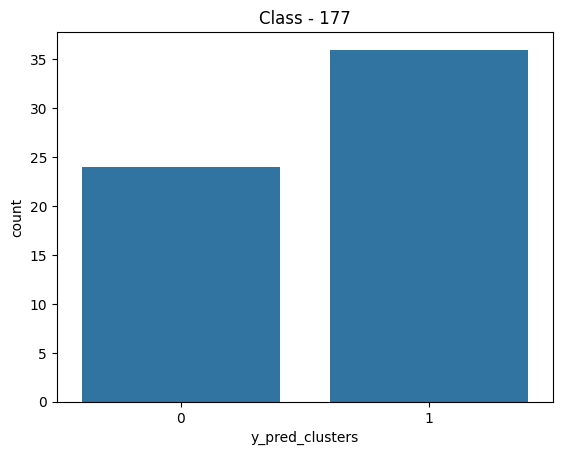

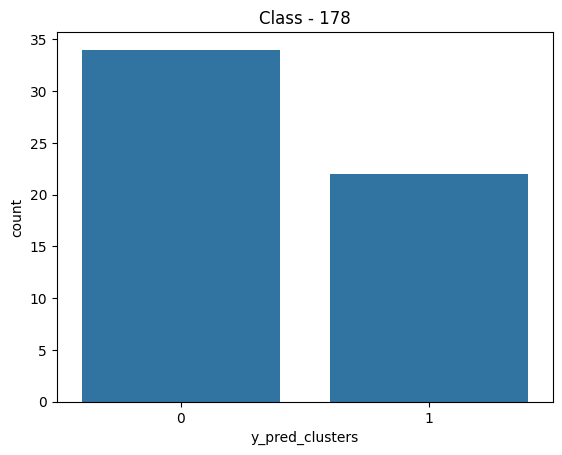

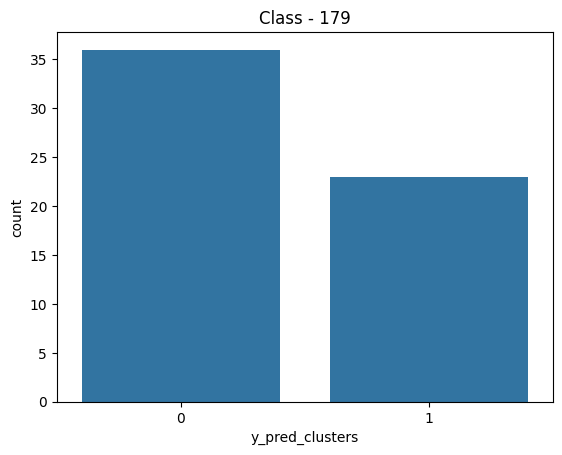

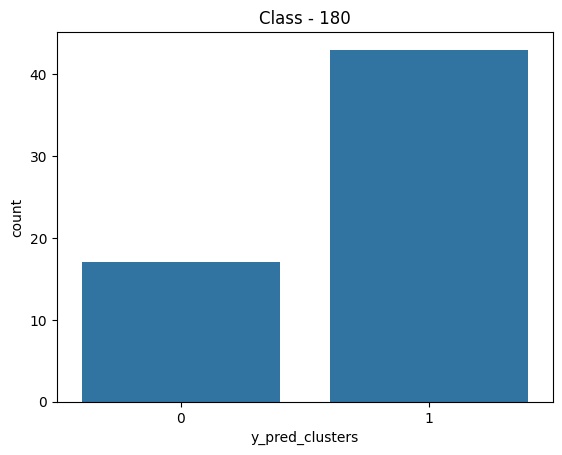

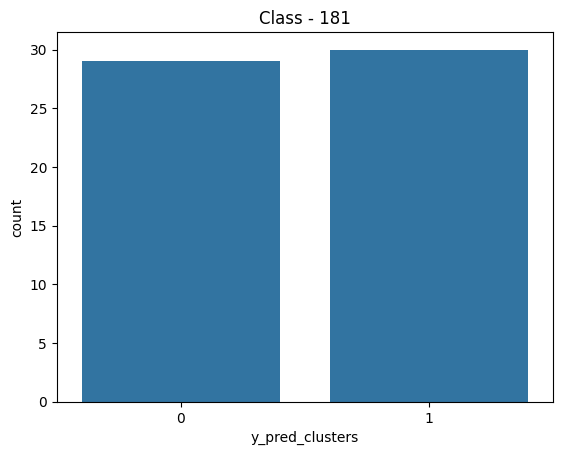

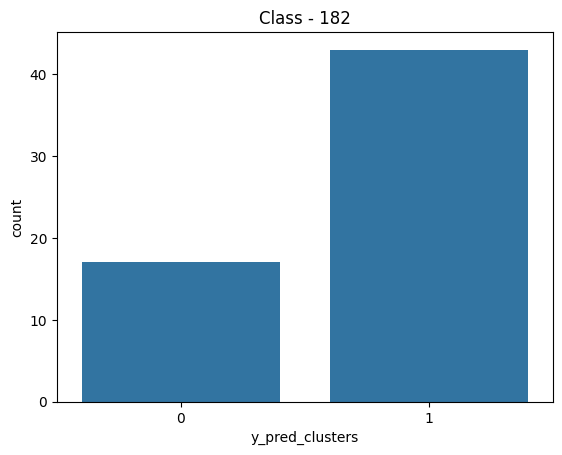

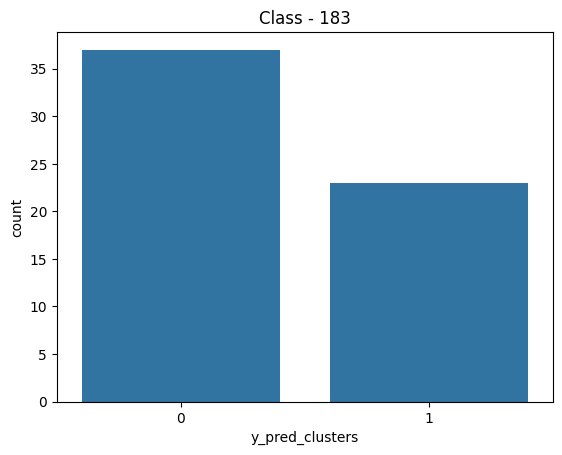

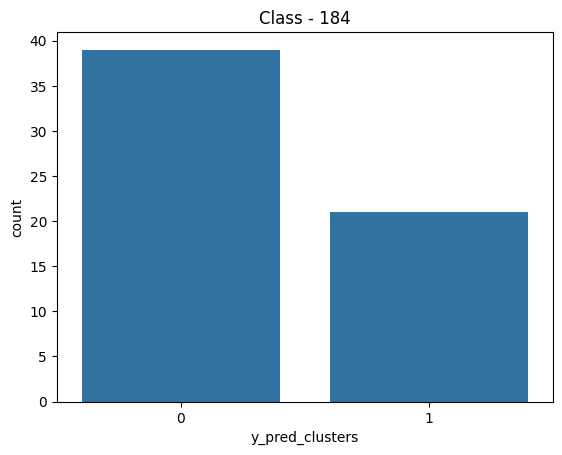

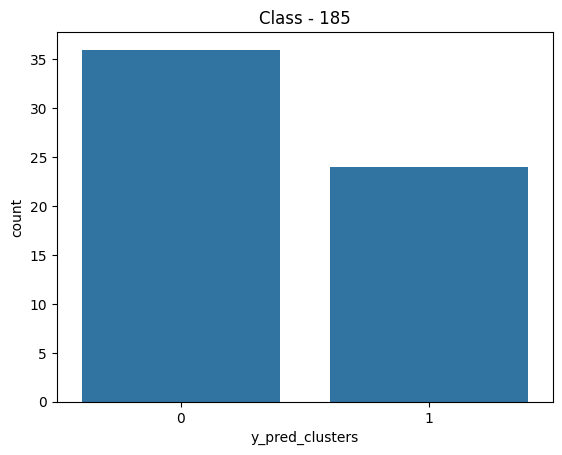

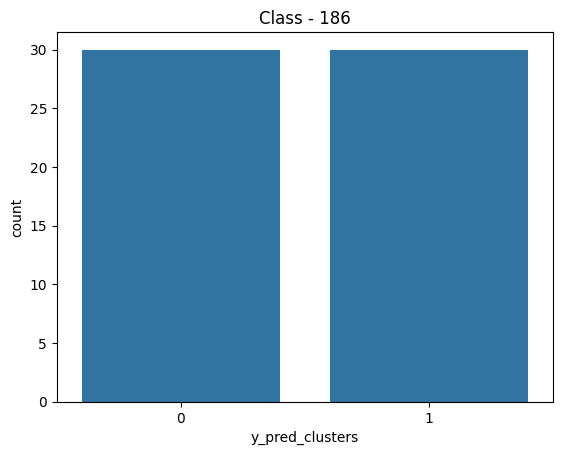

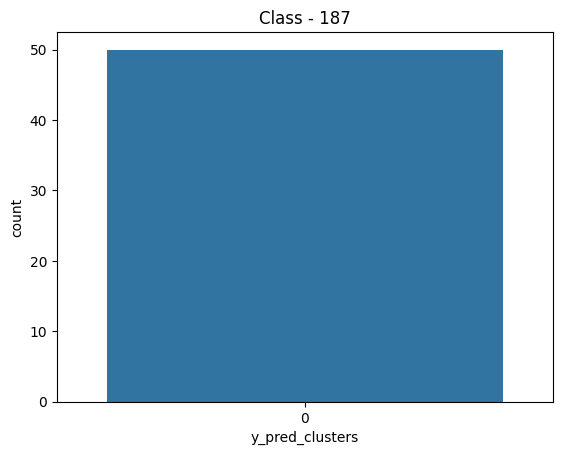

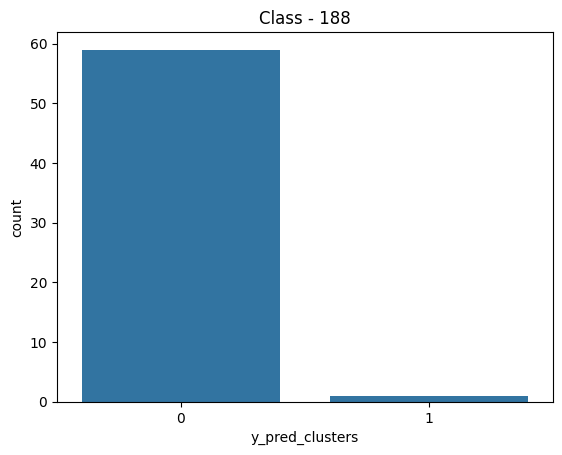

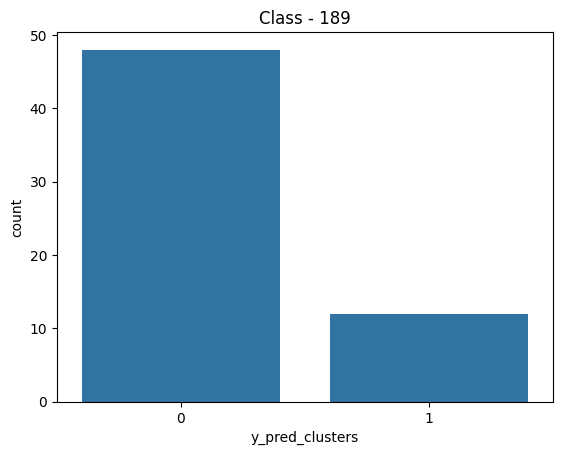

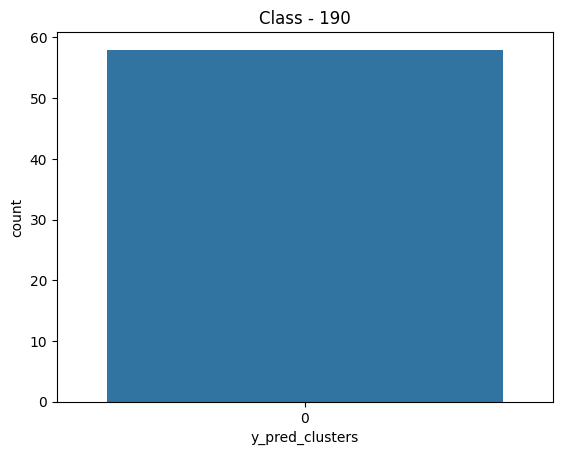

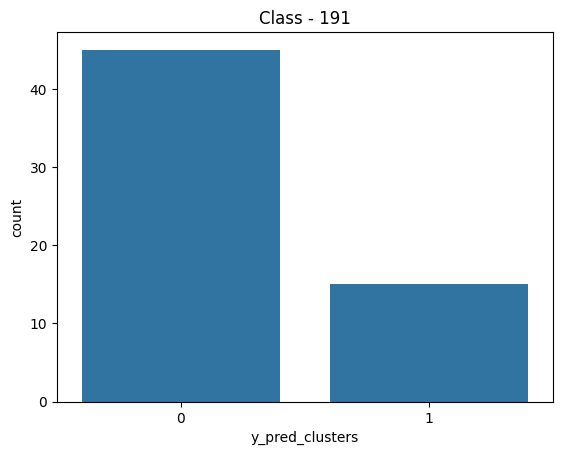

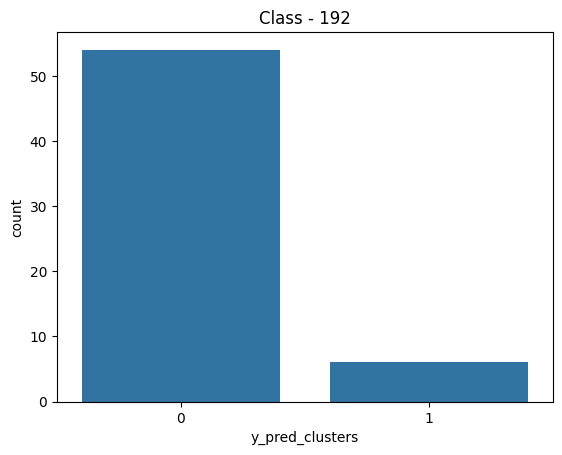

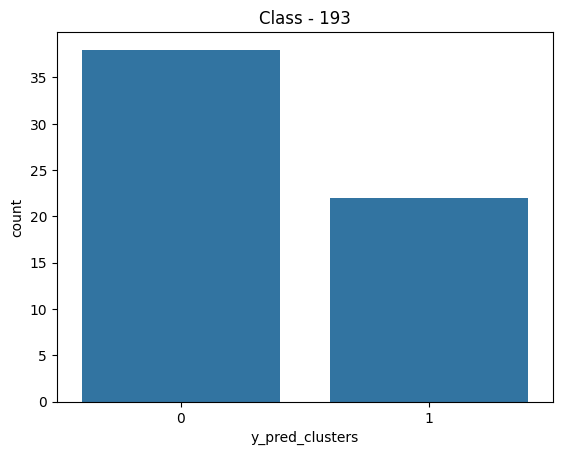

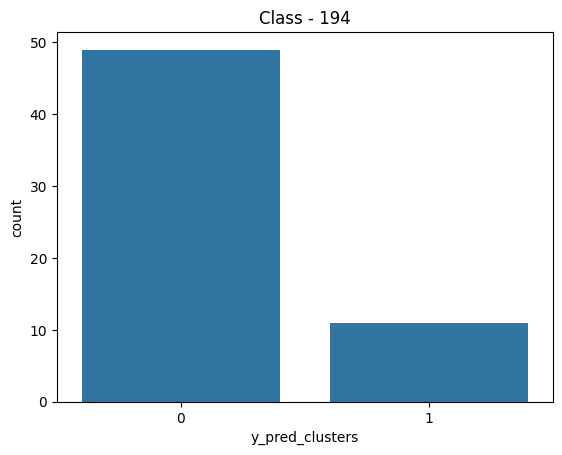

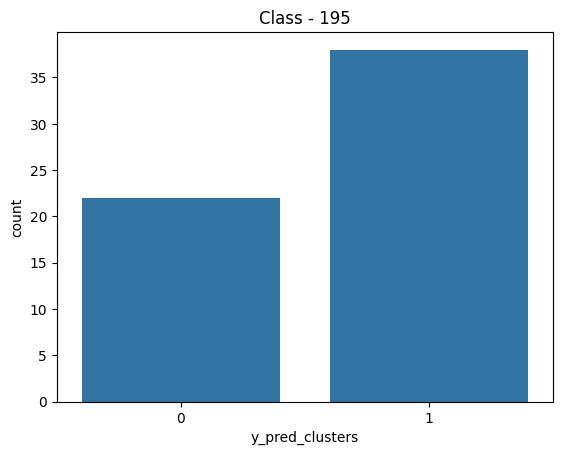

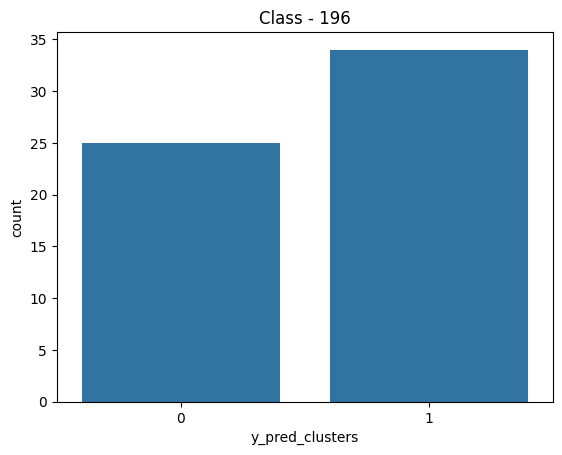

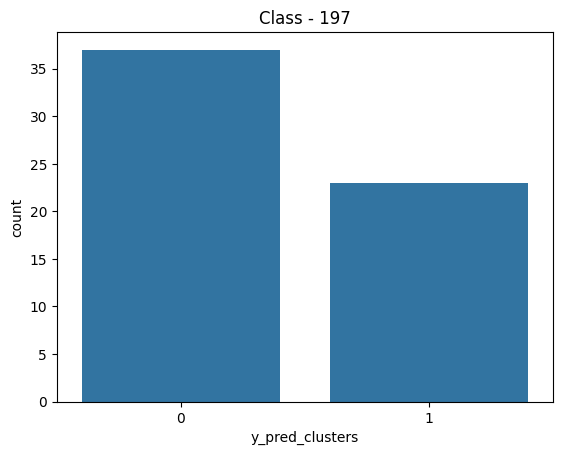

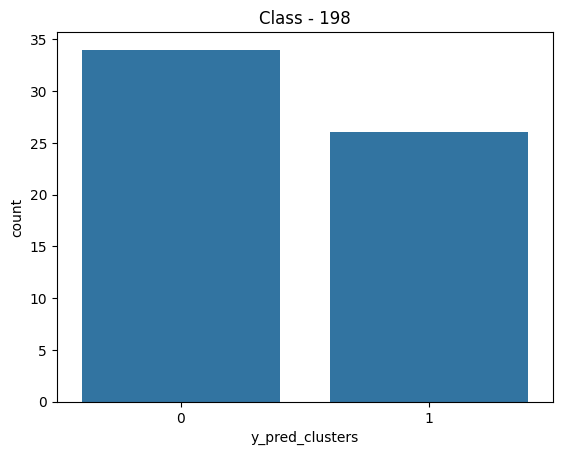

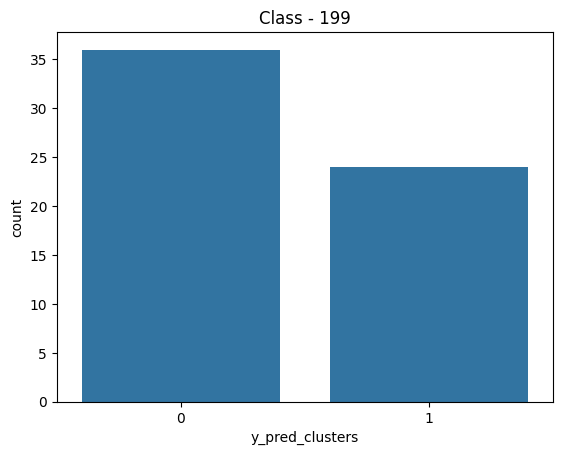

In [71]:
for i in range(1,200):
    data = df[df['class_number'] == i]
    sns.countplot(x='y_pred_clusters', data=data).set_title(f"Class - {i}")
    plt.show()

In [73]:
# Group by Class and Cluster and count the occurrences
grouped = df.groupby(['class_number', 'y_pred_clusters']).size().unstack(fill_value=0)

# Add a new column to determine the predominant cluster
grouped['finalCluster'] = (grouped[0] < grouped[1]).astype(int)

grouped

y_pred_clusters,0,1,finalCluster
class_number,,,
1,60,0,0
2,60,0,0
3,58,0,0
4,58,2,0
5,42,2,0
...,...,...,...
196,25,34,1
197,37,23,0
198,34,26,0


In [75]:
grouped['finalCluster'].value_counts()

finalCluster
0    131
1     69
Name: count, dtype: int64

In [74]:
# Save the results to a new CSV file
output_path = os.path.join('..', 'Dataset', 'Assign_cluster_cub_2.csv')  # Specify your output file path here
grouped.to_csv(output_path)

In [82]:
grouped = pd.read_csv(output_path)
print(grouped.columns, '\n')

# Filter the classes based on the predominant cluster
cluster_0_classes = grouped[grouped['finalCluster'] == 0]['class_number'].tolist()
cluster_1_classes = grouped[grouped['finalCluster'] == 1]['class_number'].tolist()

# Print the lists
print("Classes in Cluster 0: ", cluster_0_classes, "\n")
print("Classes in Cluster 1: ", cluster_1_classes)

Index(['class_number', '0', '1', 'finalCluster'], dtype='object') 

Classes in Cluster 0:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 40, 41, 44, 45, 46, 49, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 99, 100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 122, 123, 126, 128, 129, 131, 135, 137, 138, 141, 142, 143, 144, 145, 146, 147, 151, 152, 155, 159, 160, 161, 165, 167, 170, 178, 179, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 197, 198, 199] 

Classes in Cluster 1:  [14, 15, 16, 17, 19, 34, 35, 37, 38, 39, 42, 43, 47, 48, 54, 55, 56, 69, 70, 76, 77, 78, 85, 95, 96, 97, 98, 102, 103, 118, 120, 121, 124, 125, 127, 130, 132, 133, 134, 136, 139, 140, 148, 149, 150, 153, 154, 156, 157, 158, 162, 163, 164, 166, 168, 169, 171, 172, 173, 174, 175, 176, 177, 180, 181, 182, 195, 

In [86]:
df['class_lable'] = df['class_number'].apply(lambda x: 0 if int(x) in cluster_0_classes else 1)
df

,0,1,2,3,4,5,6,7,8,9,...,4091,4092,4093,4094,4095,class_number,class_labels,image_paths,y_pred_clusters,class_lable
0,3.042403,2.884922,0.000000,7.585155,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,0
1,0.000000,0.000000,9.547824,5.867018,0.000000,0.000000,0.000000,0.0,0.547732,0.614757,...,0.000000,13.213732,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,0
2,4.043432,0.000000,0.000000,1.765985,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,0
3,0.000000,0.643451,0.000000,11.106439,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,3.763441,2.361611,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,0
4,4.628635,3.541798,0.000000,2.993902,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,1.820253,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11791,12.693314,16.853743,0.000000,10.549336,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1,1
11792,0.424498,0.000000,0.000000,1.307953,0.000000,4.154796,4.755775,0.0,1.692915,0.000000,...,7.306347,5.057247,0.000000,7.918457,3.121923,200,Common Yellowthroat,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,1
11793,8.187036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0,1
11794,14.068058,0.000000,0.000000,14.220971,3.836503,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1,1


In [88]:
df['class_lable'].value_counts()

class_lable
0    7680
1    4116
Name: count, dtype: int64

In [90]:
path_df = df[['image_paths', 'class_lable']]
path_df

,image_paths,class_lable
0,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
1,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
2,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
3,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
4,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,0
...,...,...
11791,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1
11792,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1
11793,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1
11794,..\Dataset\CUB_Dataset\CUB_Dataset\CUB_200_201...,1


In [95]:
# Base directory where folders will be created
base_dir = 'dataset'

# Iterate over each row in the DataFrame
for _, row in path_df.iterrows():
    image_path = row['image_paths']
    folder_name = row['class_lable']
    # dest_folder = os.path.join(base_dir, folder_name)
    dest_folder = os.path.join(base_dir, str(folder_name))

    # Ensure the destination folder exists
    os.makedirs(dest_folder, exist_ok=True)

    # Copy the image to the destination folder
    try:
        shutil.copy(image_path, dest_folder)
        # print(f"Copied {image_path} to {dest_folder}")
    except FileNotFoundError:
        print(f"Error: {image_path} not found")
    except Exception as e:
        print(f"Error copying {image_path} to {dest_folder}: {e}")

In [99]:
# Save the results to a new CSV file
output_path = os.path.join('..', 'Dataset', 'final_cluster_cub_dataset.csv')  # Specify your output file path here
df.to_csv(output_path, index=False)

# Real time prediction using Kmean